# **MGT-415: Seminar #1**

- Bouraux Léopold
- Debains Gaspard
- De la Fage Jean-Baptiste
- Méhaignerie Gabriel
- Trébaol Tristan
- Villegas Alfonso

_____
_____

## **Instruction:** 

### Welcome to the office !

You have recently started your job as a Data Scientist in a famous telecom company. As you may very well know, telecoms fiercely fight for customer retention, with entire service branches devoted to this task. This is due to the fact that retention is more cost efficient than capturing new clients. One of your colleagues from the master got hired in the Marketing Department, and he needs to understand the company’s clients, so he’s asked you to help him out with a descriptive report and segmentation of the customer base. He’s specially interested in the lifetime value of loyal customers. Thus, you can ignore (for now) those who leave the company (churn).

Prepare a descriptive report and segment the customers in the most adequate way. For this assignment, use the data on customers.csv. Clean, organise and present an exploratory analysis of the data. What can you tell about the customers ?

_____
_____

## **Problem resolution**

The analysis of customer attrition is very often used by telecom companies. This is because the cost of acquiring a new customer is significantly higher than the cost of retaining an existing customer. The cost of recruiting new customers is often much higher than the cost of retaining an existing one, and the latter approach is therefore a way more profitable. 

In this analysis, we will look at different parameters specific to a telecom company's customers, and we will investigate which ones are the most relevant and which ones can predict whether a customer will remain loyal to the company.

As a first step, we will find out what customer data we have access to. Then we will try to find links between these parameters and the duration of customer fidelity to the company. Finally, we will draw conclusions and try to establish a strategy to keep customers as long as possible in order to reduce the cost of recruiting new clients. 

#### **Data discovery**


In [0]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

First, we load the data into a pandas dataframe.

In [0]:
df_ = pd.read_csv("customers.csv") 
df_[488:489]

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
488  4472-LVYGI  Female              0  ...          52.55                  No

[1 rows x 21 columns]

The first thing to do when preprocessing a database is to check if there are missing values, if the values are in the right type (float, string, int, ...), or if there are outliers. The way in which erroneous or missing data can be replaced each time depends on the database and the way in which the missing elements are distributed within the data. If the incorrect data are randomly arranged in features, replacing them will be more tricky than if the missing data are only in a particular feature and that feature is dependent on other features. In other cases, it may be that for a particular individual there are too many missing values, in which case replacing the values with the mean, the median or any interpolated value of the feature may be a possible alternative, but removing that individual from the database may also be a solution.

The database we need to analyze is relatively complete, however
we notice that some values that are supposed to be numerical values are interpreted as strings : 
```SeniorCitizen``` and ```TotalCharges```. Then we convert these numerical features into float.
We also observe that certain values are missing, especially in the
```TotalCharges``` 
column. 


Fortunately, 
```TotalCharges``` 
values are easy to compute, they are dependant of others features:
```TotalCharges``` = ```tenure``` $\cdot$ ```MonthlyCharges```.
And we notice that these values are missing only when the tenure feature is equal to 0. Then we replace ```TotalCharges``` missing values by 0 in order to obtain a clean database. 

In [0]:
df_.replace(' ', 0.0, inplace=True)
df_["SeniorCitizen"] = pd.to_numeric(df_["SeniorCitizen"], downcast="float")
df_["TotalCharges"] = pd.to_numeric(df_["TotalCharges"], downcast="float")
df_.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female            0.0  ...          29.85    29.850000     No
1  5575-GNVDE    Male            0.0  ...          56.95  1889.500000     No
2  3668-QPYBK    Male            0.0  ...          53.85   108.150002    Yes
3  7795-CFOCW    Male            0.0  ...          42.30  1840.750000     No
4  9237-HQITU  Female            0.0  ...          70.70   151.649994    Yes

[5 rows x 21 columns]

We are now ready to analyze each feature.

In [0]:
print('Number of client in the database:', df_.shape[0], '\nNumber of data feature:', df_.shape[1],'\n')
print(df_.dtypes)

Number of client in the database: 7043 
Number of data feature: 21 

customerID           object
gender               object
SeniorCitizen       float32
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object


As expected, only 
```SeniorCitizen```, ```tenure```, ```MonthlyCharges```  and ```TotalCharges``` parameters are numerical ones. 
There are **discrete** data and **continuous** data, so we're going to have to take that into account so we can plot the influence of some parameters on others. Moreover as we are only interested by our current customers, we should ignore (for now) those who leave the company (churn). We therefore filter all the data. 
In addition, we can remove the first feature ```customerID``` which is useless for the moment because we don't want to target specific customers.

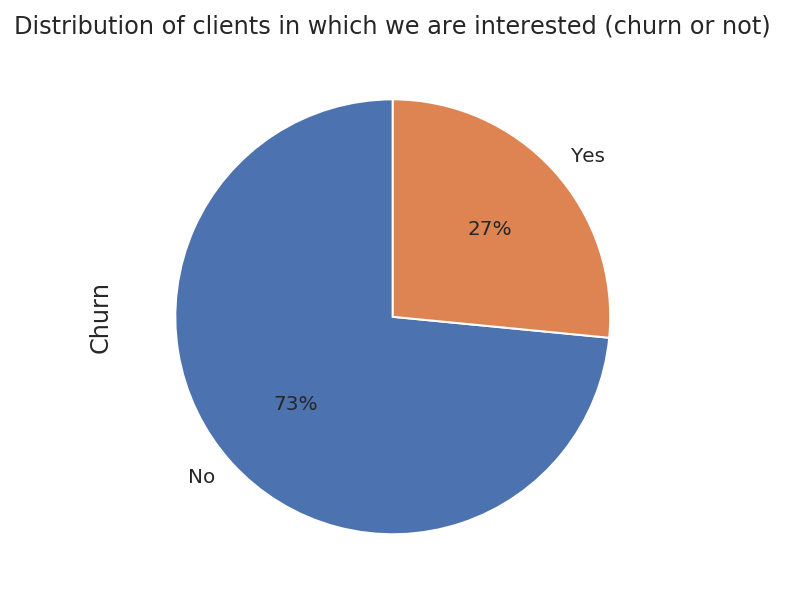

Here is the haed of the database filtered with only current active customers:


gender  SeniorCitizen  ... MonthlyCharges TotalCharges
0  Female            0.0  ...          29.85    29.850000
1    Male            0.0  ...          56.95  1889.500000
3    Male            0.0  ...          42.30  1840.750000
6    Male            0.0  ...          89.10  1949.400024
7  Female            0.0  ...          29.75   301.899994

[5 rows x 19 columns]

In [0]:
df_copy = df_.copy()
df_copy=df_copy.drop(columns="customerID")
df_copy.Churn.value_counts().plot(kind='pie', startangle =90, autopct='%1.0f%%', fontsize=10)
plt.title('Distribution of clients in which we are interested (churn or not)')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

print("Here is the haed of the database filtered with only current active customers:")
df = df_copy[df_copy.Churn == 'No']
df=df.drop(columns="Churn")
df.head()

#### **Univariate Data Analysis**

First let's plot each discrete feature distribution individually, and then continuous ones:

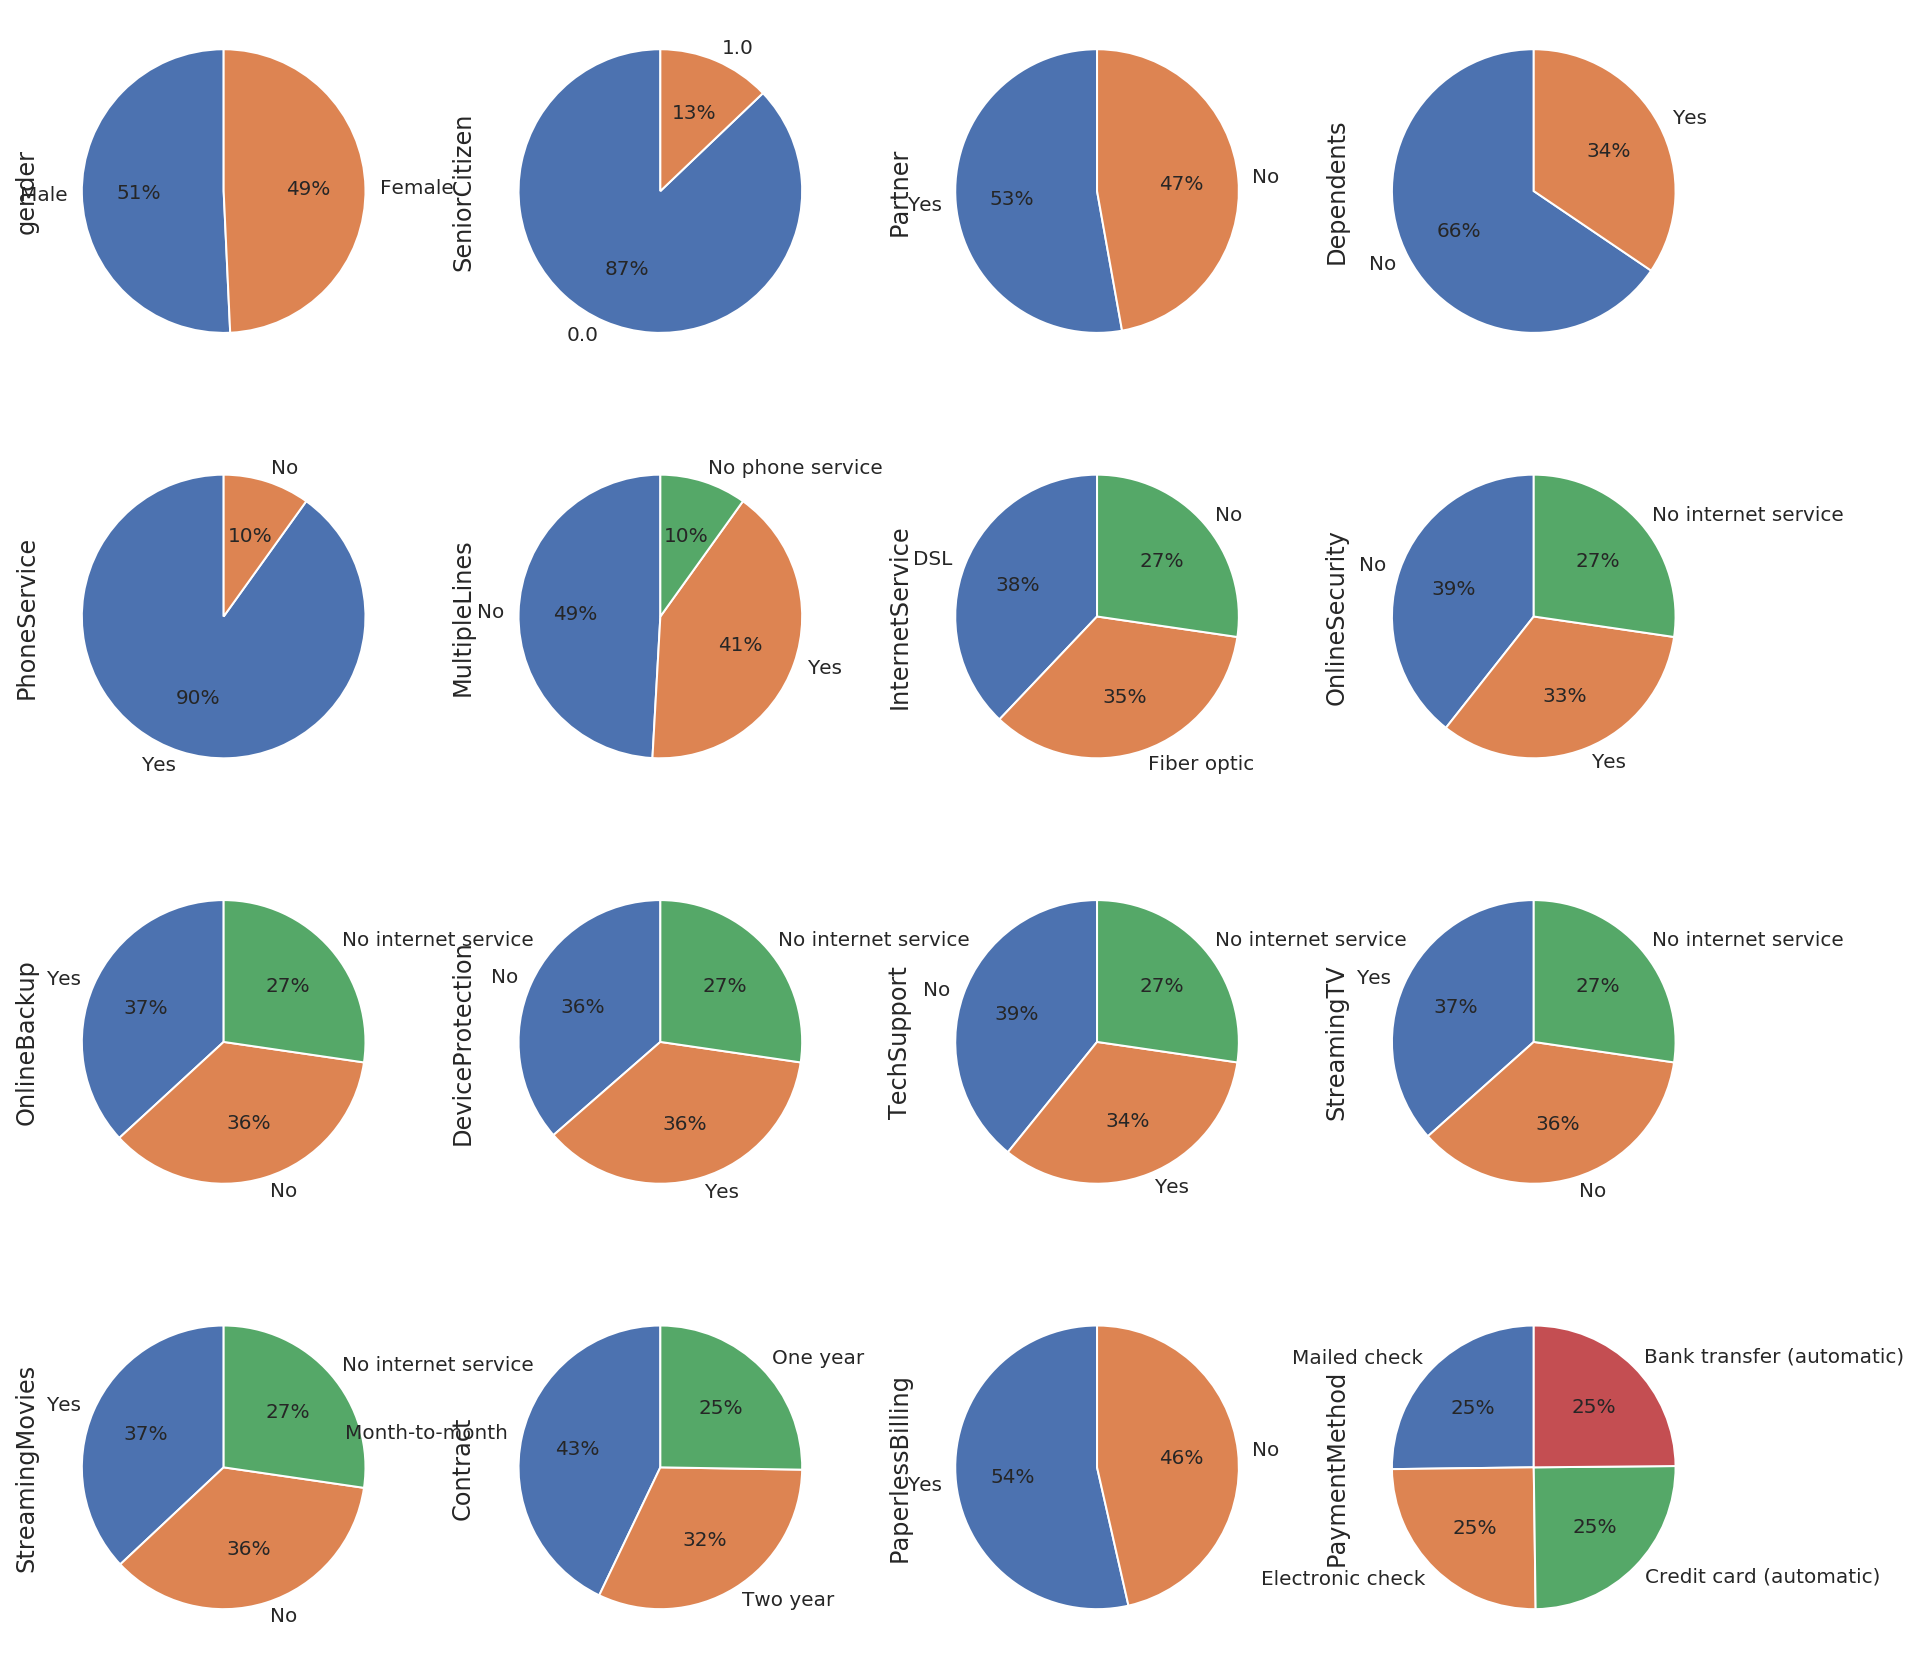

In [0]:
l = list(df.columns)
cont_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
disc_col = [e for e in l if e not in cont_col]

counter=0
nrows=4
ncols=4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(nrows):
  for j in range(ncols):
    df[disc_col[counter]].value_counts().plot(kind='pie', startangle =90, autopct='%1.0f%%', fontsize=10, ax=axes[i,j])
    counter+=1
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Looking at the different pie charts shown above, we have a first simple vizualisation of the data at hand. The pie plot is good way to represent our different features as each feature has from 2 to 4 options. 
As we can see, the company has as many female clients as male customers and there's a fairly even split between people who are in relationships or not. These data do not seem to be wrong. Only 13% of clients are senior citizens, which again seems quite logical, as not all the seniors have an Internet access.

We note that only 10% of customers have no telephone service. At first sight, it seems strange, but we can imagine that these customers are foreign customers and that they take advantage of their foreign package operating in their country of residence. 
Nearly 40% have subscribed to several telephone lines at the same time, so we can think of families, where parents pay for their children's telephone package. Otherwise, 50% of customers have only one line, probably a young couple household or single people.

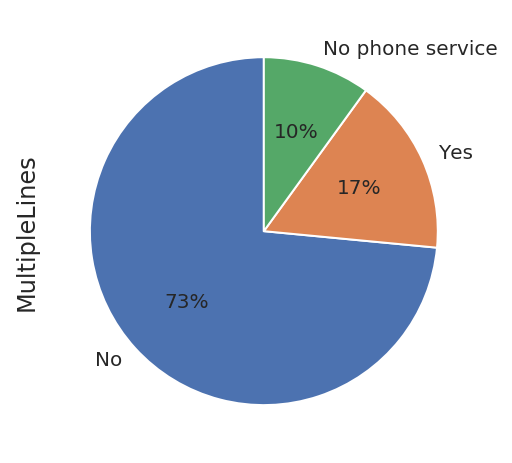

In [0]:
df2 = df[df['PaymentMethod'] == 'Mailed check']
df3 = df2[df2['Contract'] == 'Month-to-month']

df3['MultipleLines'].value_counts().plot(kind='pie', startangle =90, autopct='%1.0f%%', fontsize=10)
plt.show()

By trying several combinations of different parameters, having a monthly contract and having a payment method by email maximizes the probability to have only one line. Therefore, long term contracts and other payment methods should be preferred to ensure that the customer is more likely to have multiple phone lines. 

Getting back to the univariate analysis of the parameters, we can see that 38% and 35% of customers use respectively the DSL or the fiber optic, while 27% don't have any internet service. These people are probably using their mobile phone internet connection to go online. What may be interesting for future graphs is to add a new equipment column that records whether customers have either an internet connection, a phone subscription, or both.

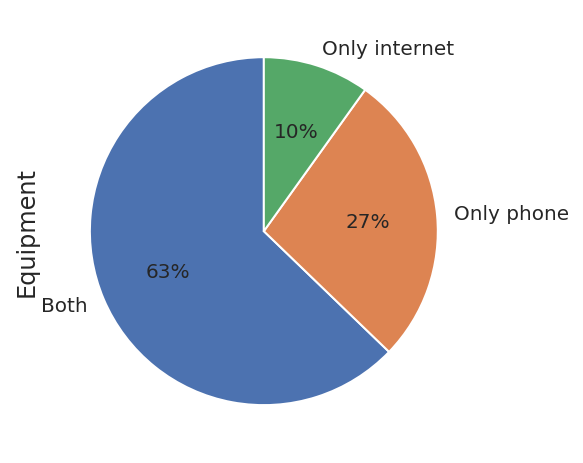

In [0]:
equipmt = []
for i in range(0,len(df.gender)):
  if (df['PhoneService'].iloc[i] == 'No' and df['InternetService'].iloc[i] != 'Yes'):
      equipmt += ['Only internet']
  elif (df['PhoneService'].iloc[i] == 'Yes' and df['InternetService'].iloc[i] == 'No'):
      equipmt += ['Only phone']
  elif (df['PhoneService'].iloc[i] == 'Yes' and df['InternetService'].iloc[i] != 'Yes'):
      equipmt += ['Both']
df['Equipment']=equipmt
df['Equipment'].value_counts().plot(kind='pie', startangle =90, autopct='%1.0f%%', fontsize=10)
plt.show()

l = list(df.columns)
cont_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
disc_col = [e for e in l if e not in cont_col]

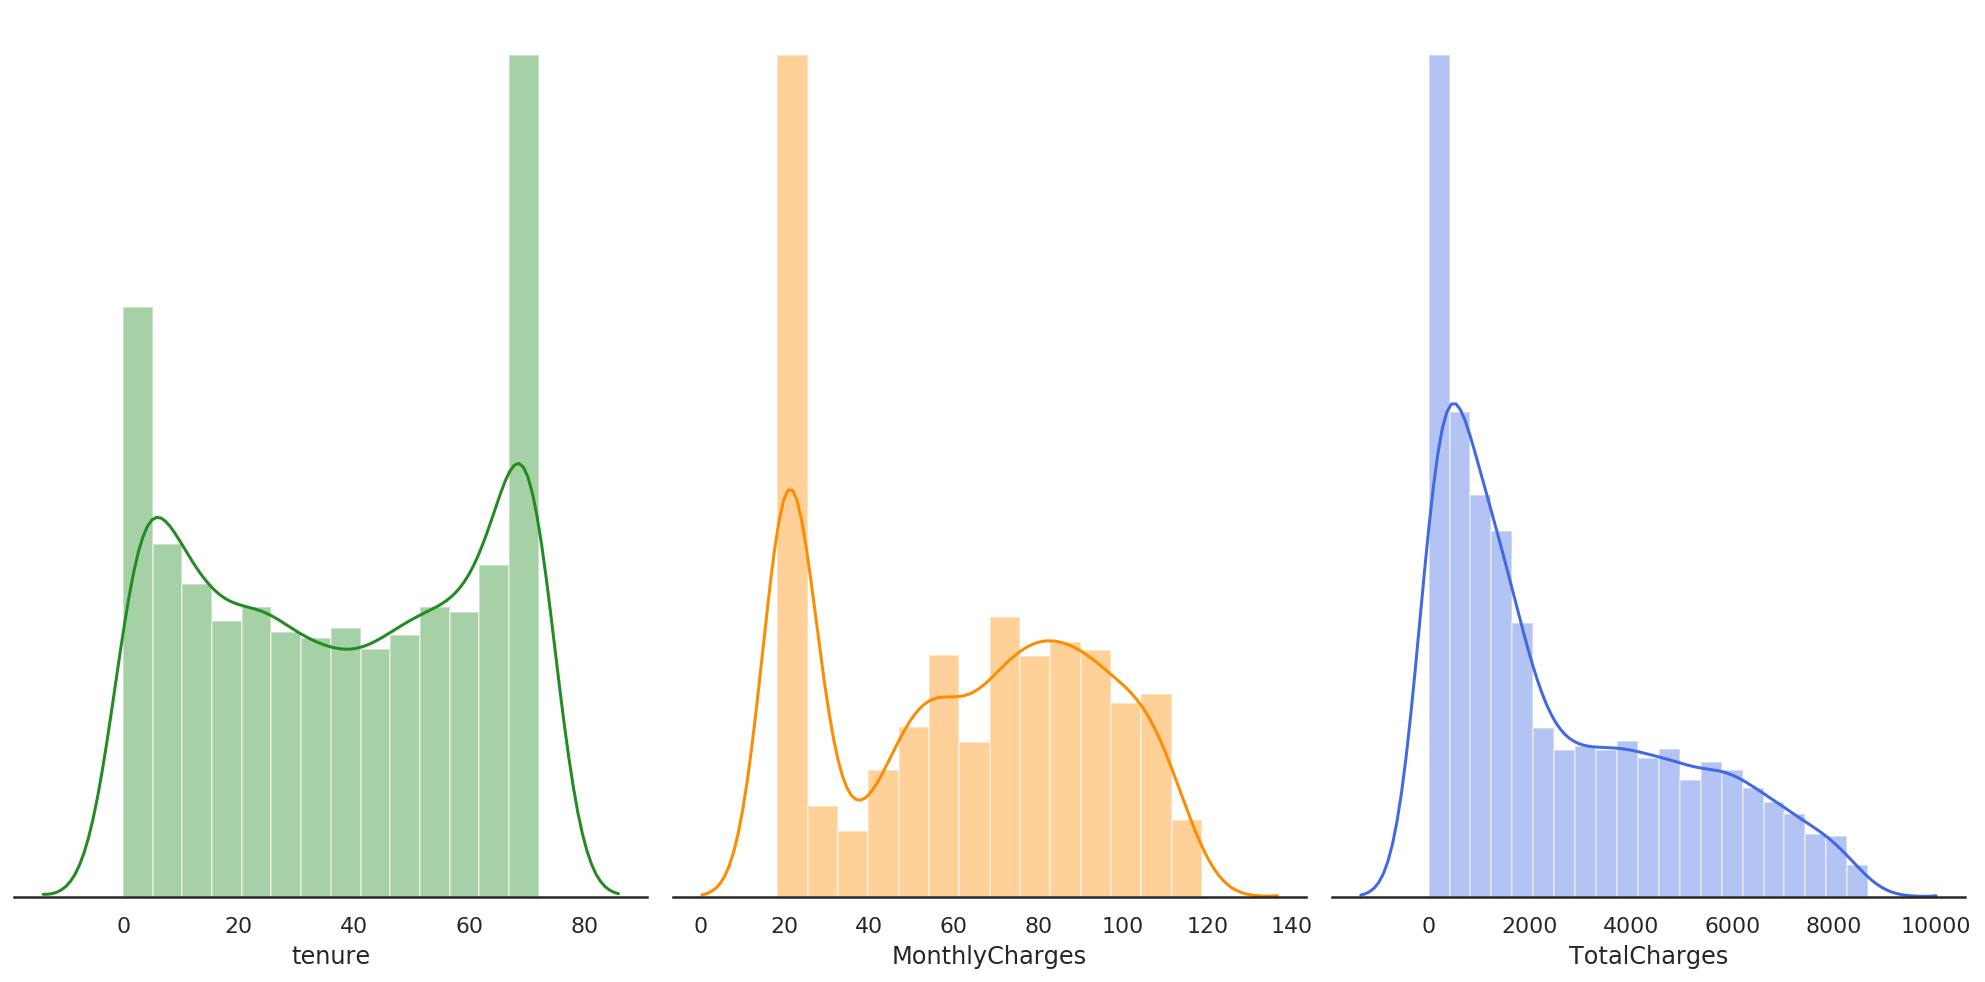

In [0]:
f, axes = plt.subplots(1, 3, figsize=(14, 7), sharex=False)
sns.despine(left=True)

sns.distplot(df[cont_col[0]], color="forestgreen", ax=axes[0])
sns.distplot(df[cont_col[1]], color="darkorange", ax=axes[1])
sns.distplot(df[cont_col[2]], color="royalblue", ax=axes[2])

plt.setp(axes, yticks=[])
plt.tight_layout()

Here above are the distribution plots for the numerical features. In these graphs we can observe that: 
- The tenure probability distribution is a kind of bimodal distribution with a peak on each extremities: people tend to stay either a very short period of time or a very long one.
- The monthly charges distribution has a high peak for very small montly charges, couple to a more classical distribution centered at 80. 
- The total charges distributions is the multiplication of the two previous. It has a peak at small total charges and decreases onward.

We can see that these distributions don't have classical shapes, so we can expect that they depend strongly on other parameters, so this is what we will study now. Specifically we are interested in parameters that increase tenure.

#### **Multivariate Data Analysis**

First, we plot the tenure distribution against each of the other parameters to see if any of these parameters support an increase in tenure.

In [0]:
df.head()

gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges      Equipment
0  Female            0.0     Yes  ...          29.85     29.850000  Only internet
1    Male            0.0      No  ...          56.95   1889.500000           Both
3    Male            0.0      No  ...          42.30   1840.750000  Only internet
6    Male            0.0      No  ...          89.10   1949.400024           Both
7  Female            0.0      No  ...          29.75    301.899994  Only internet

[5 rows x 20 columns]

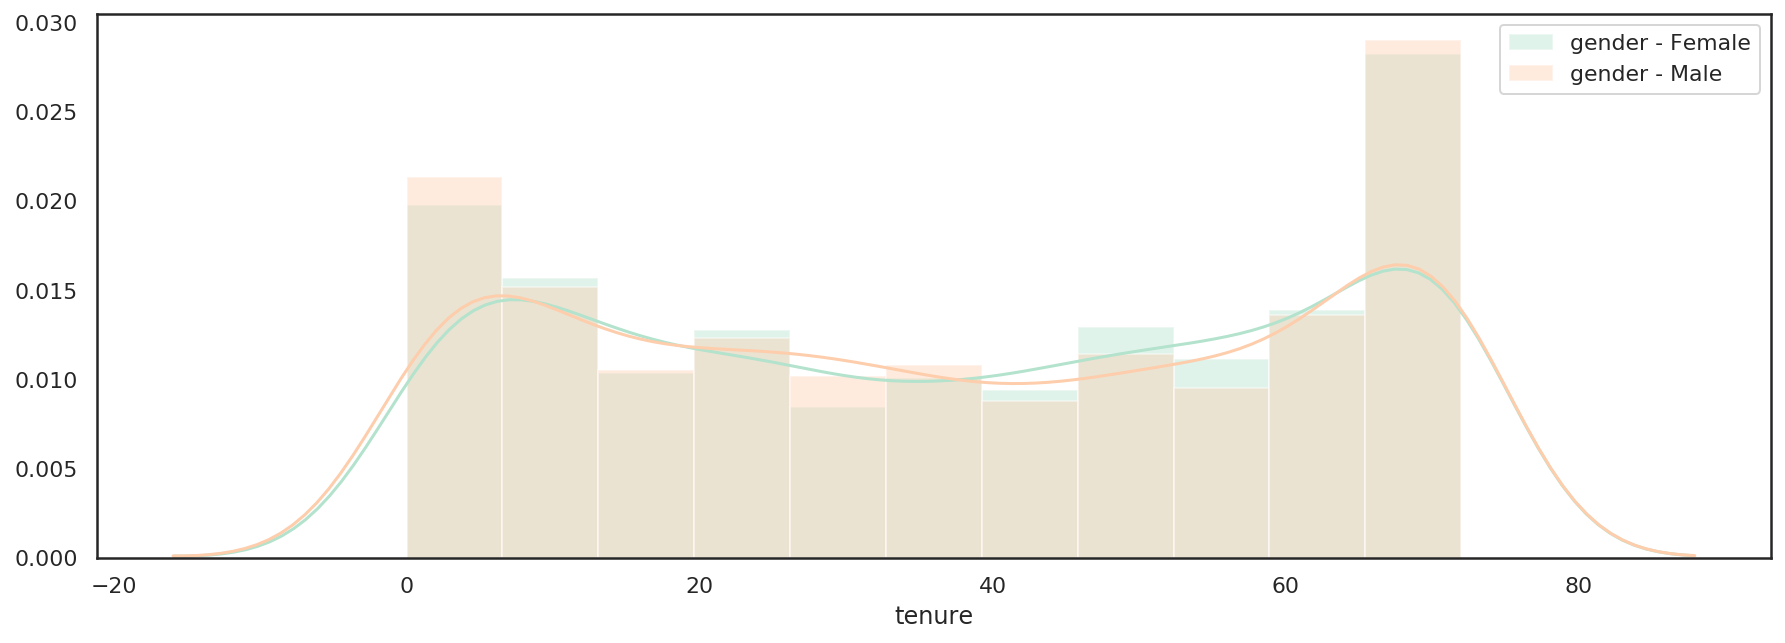

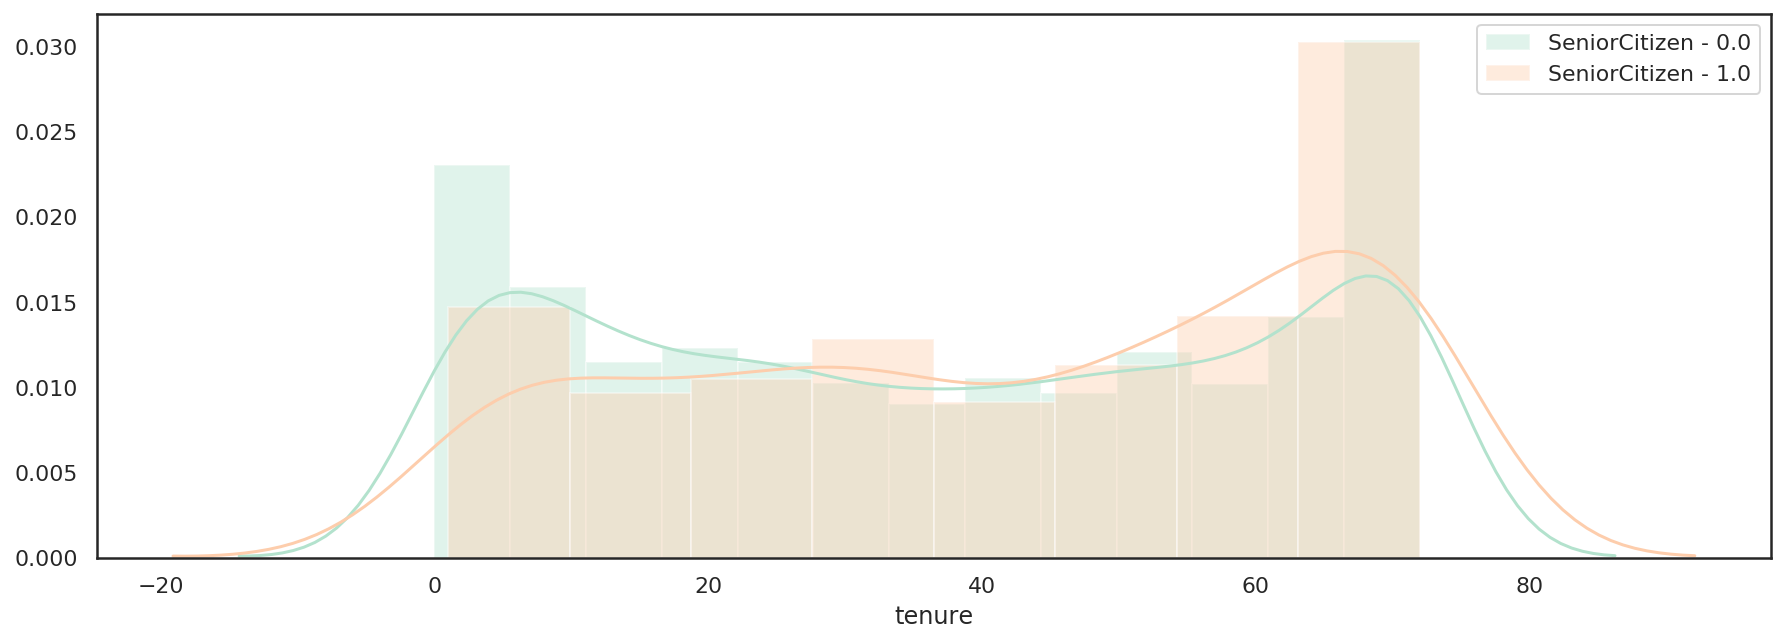

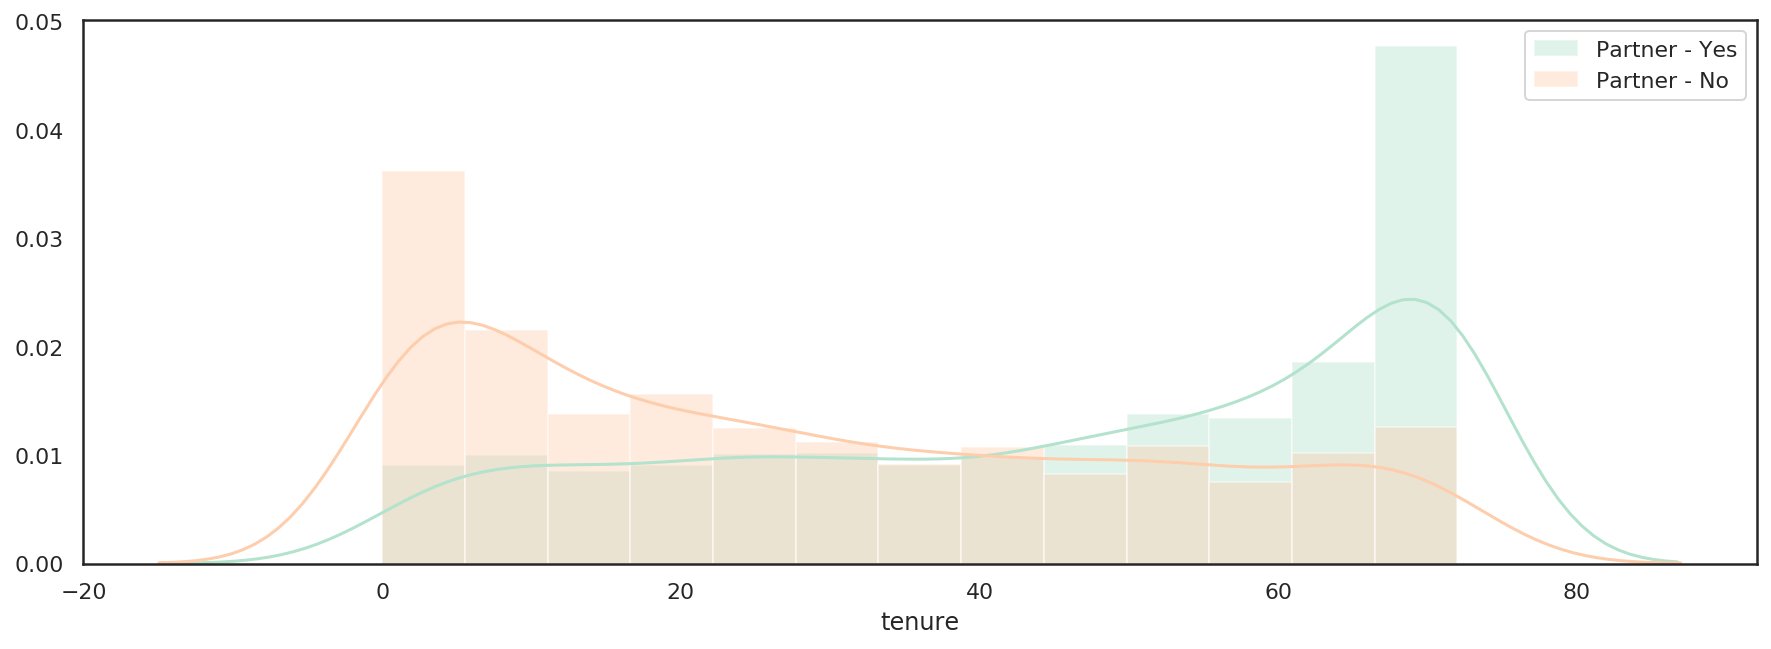

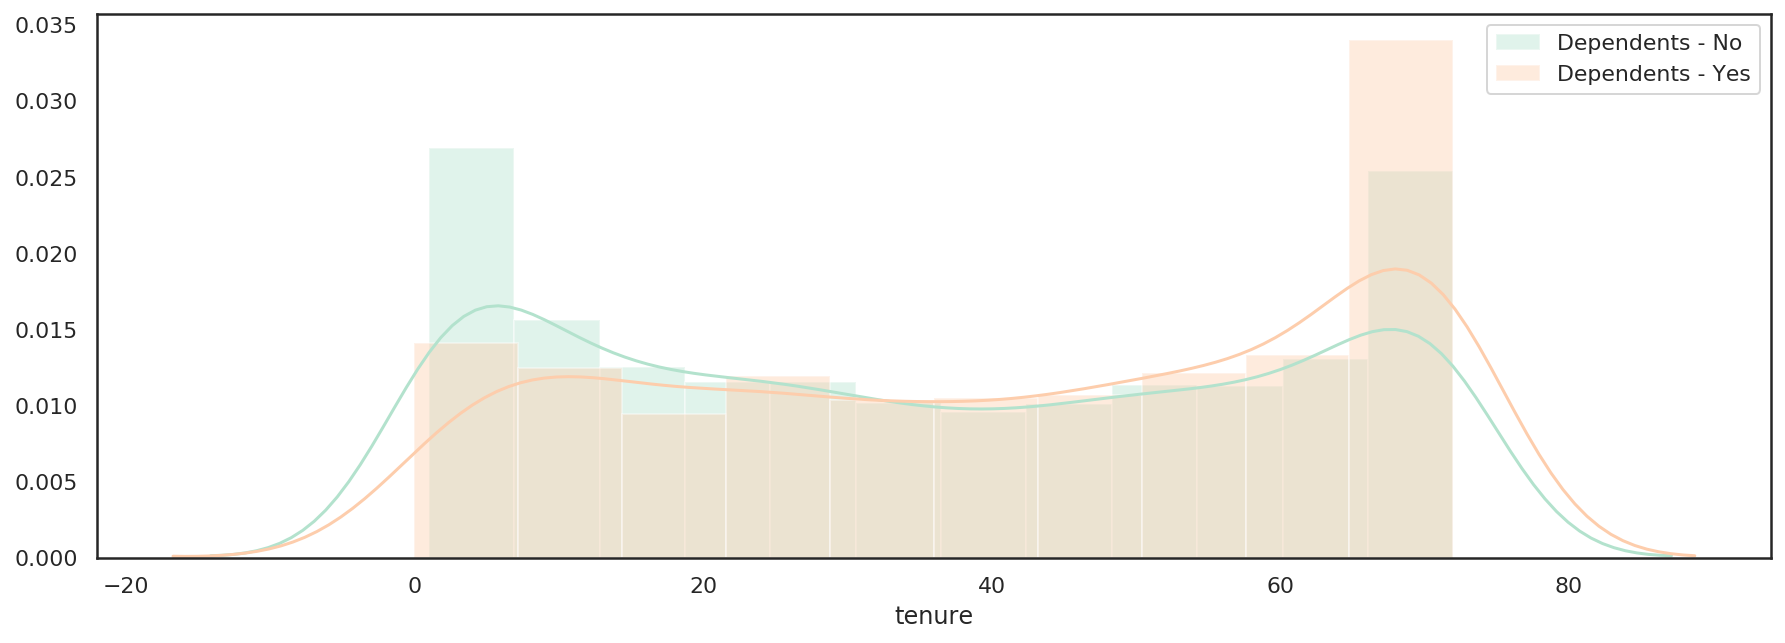

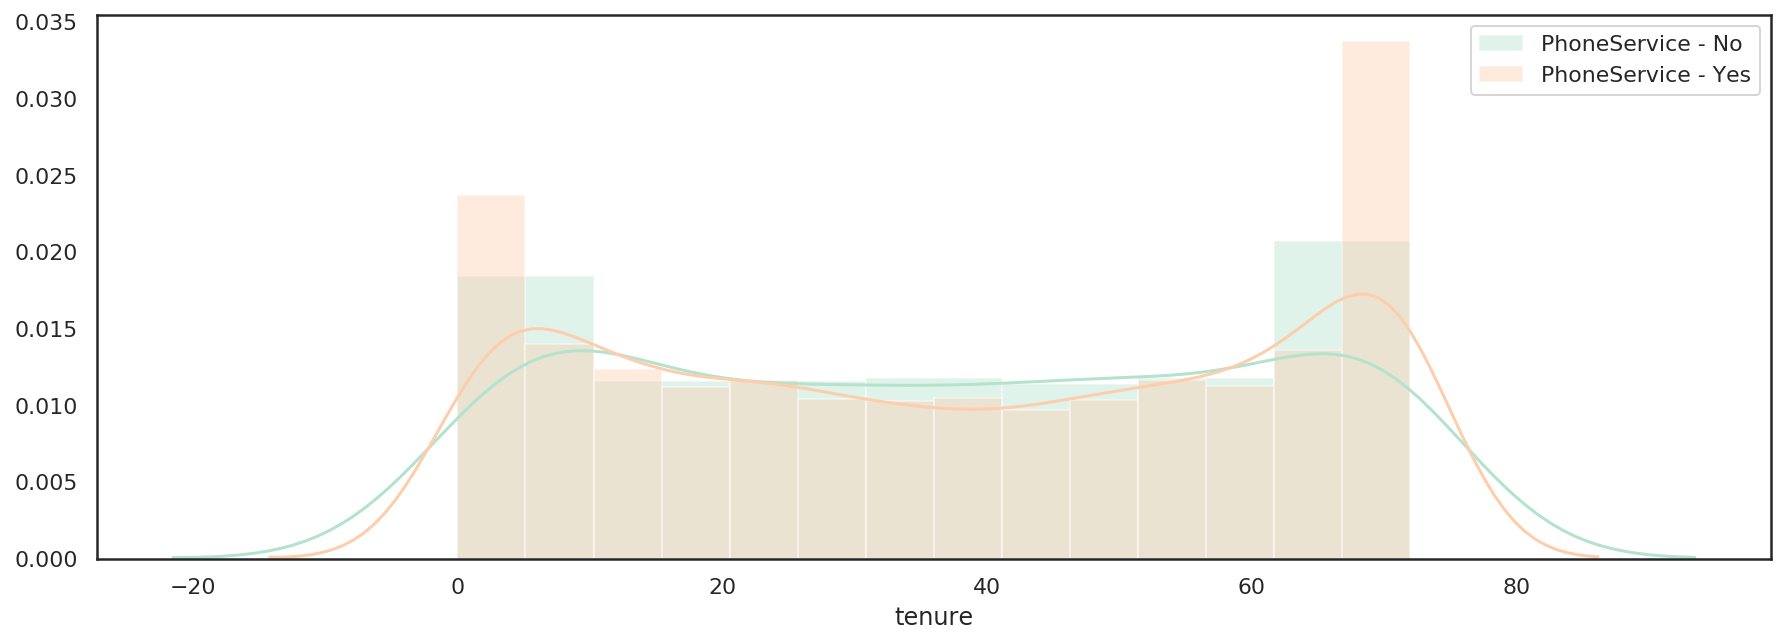

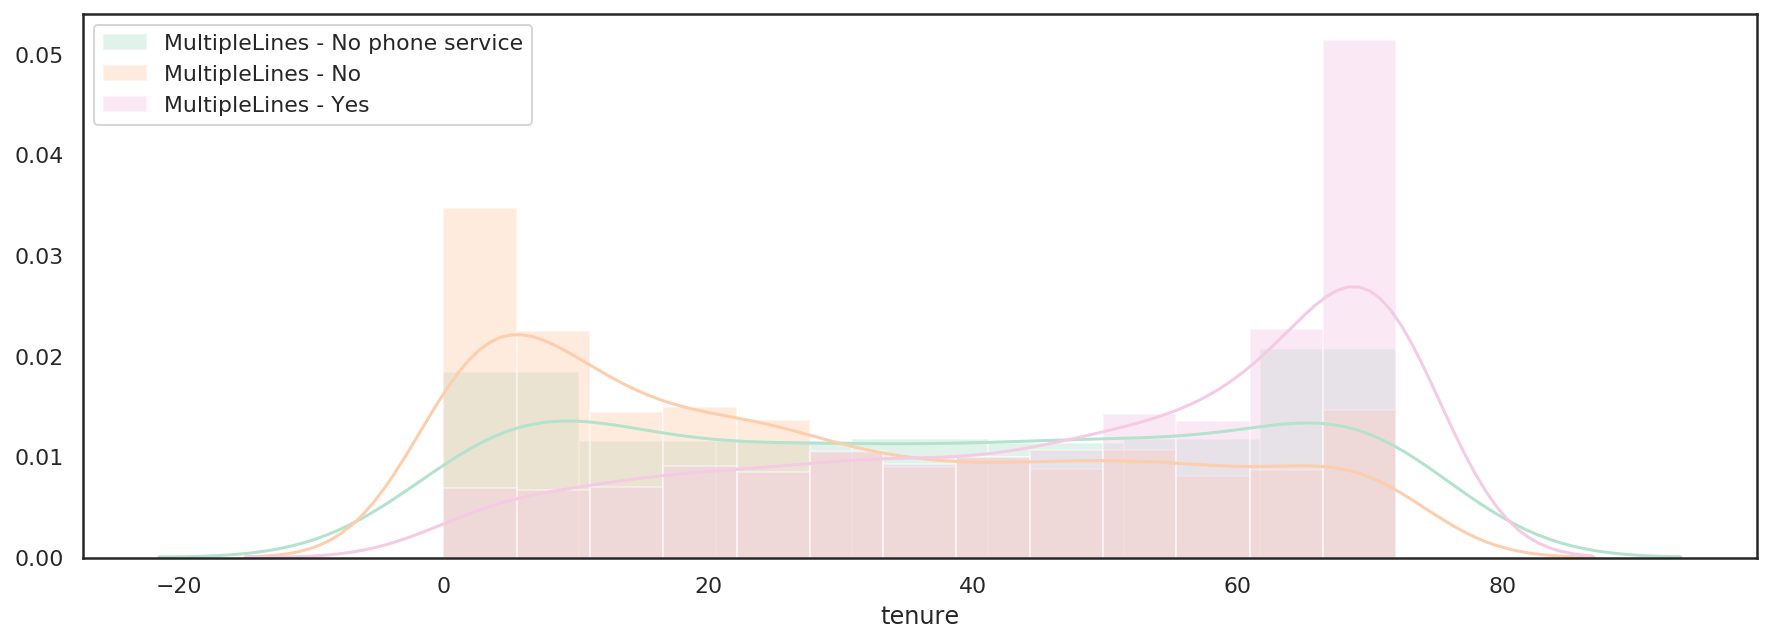

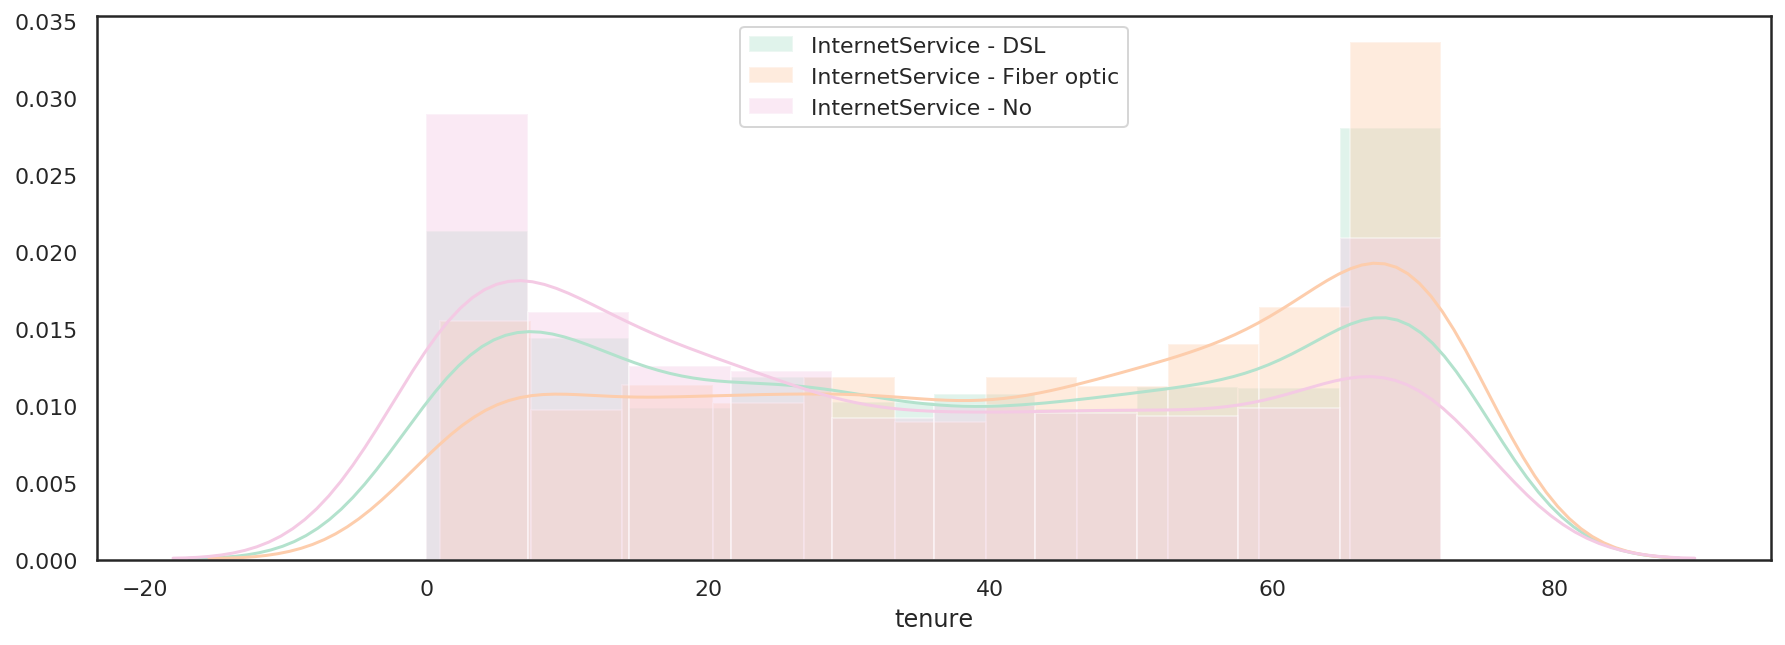

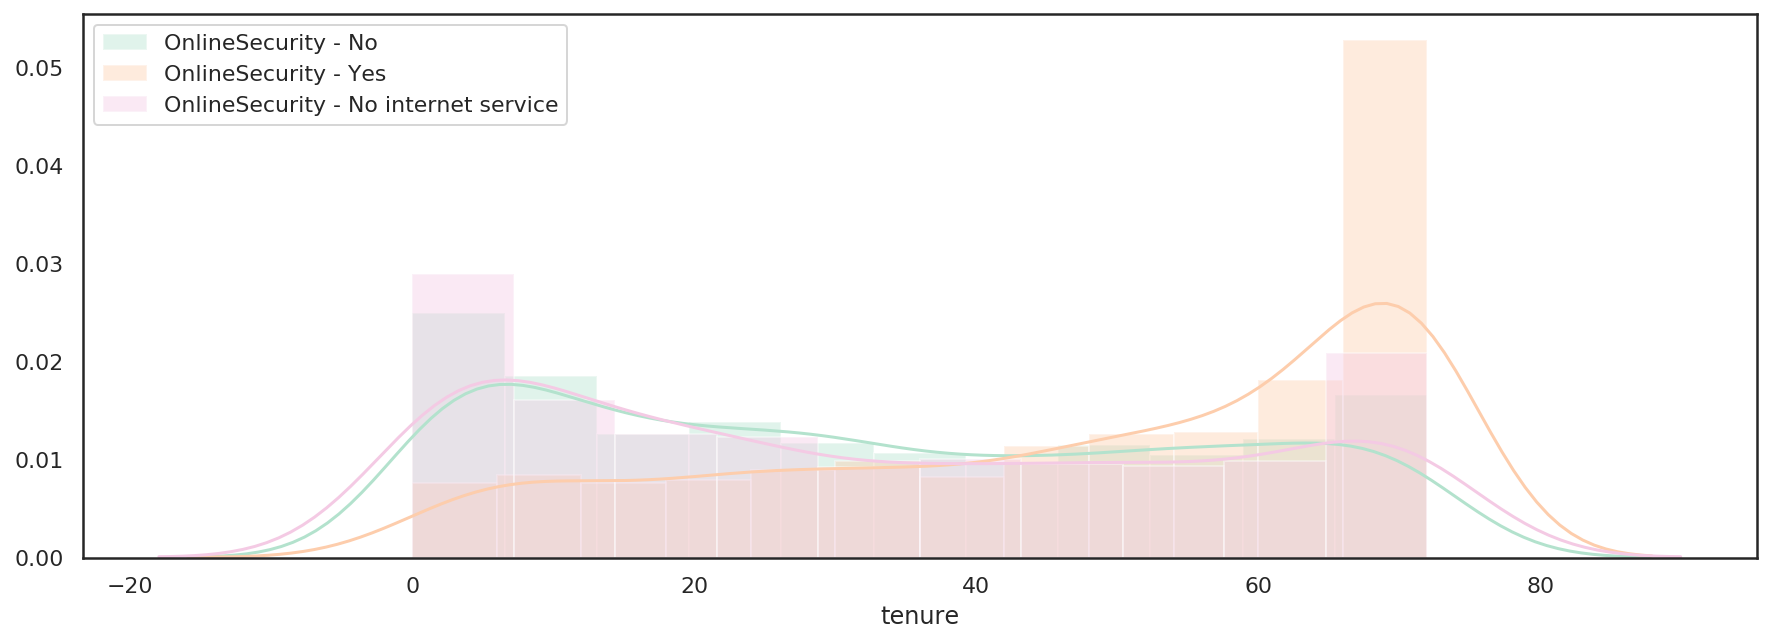

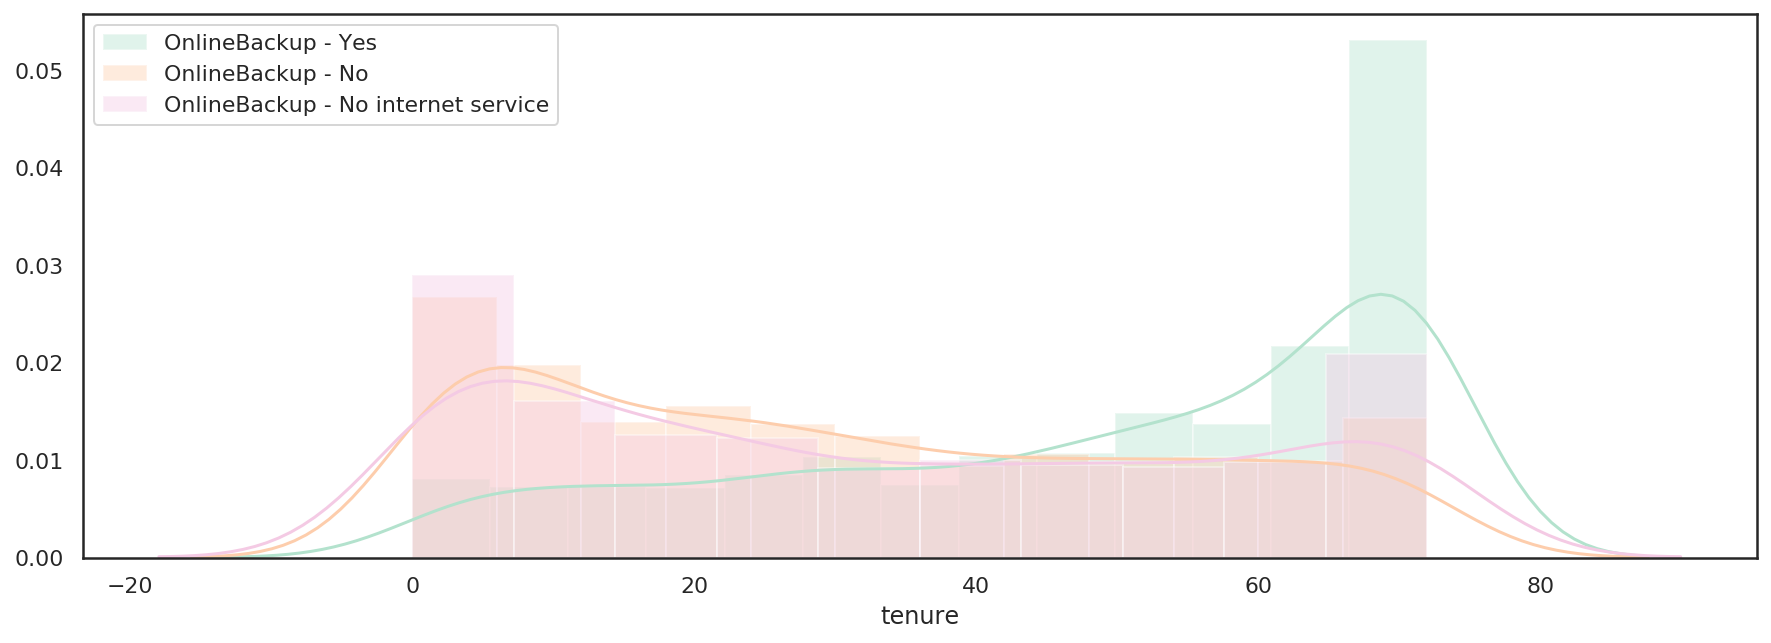

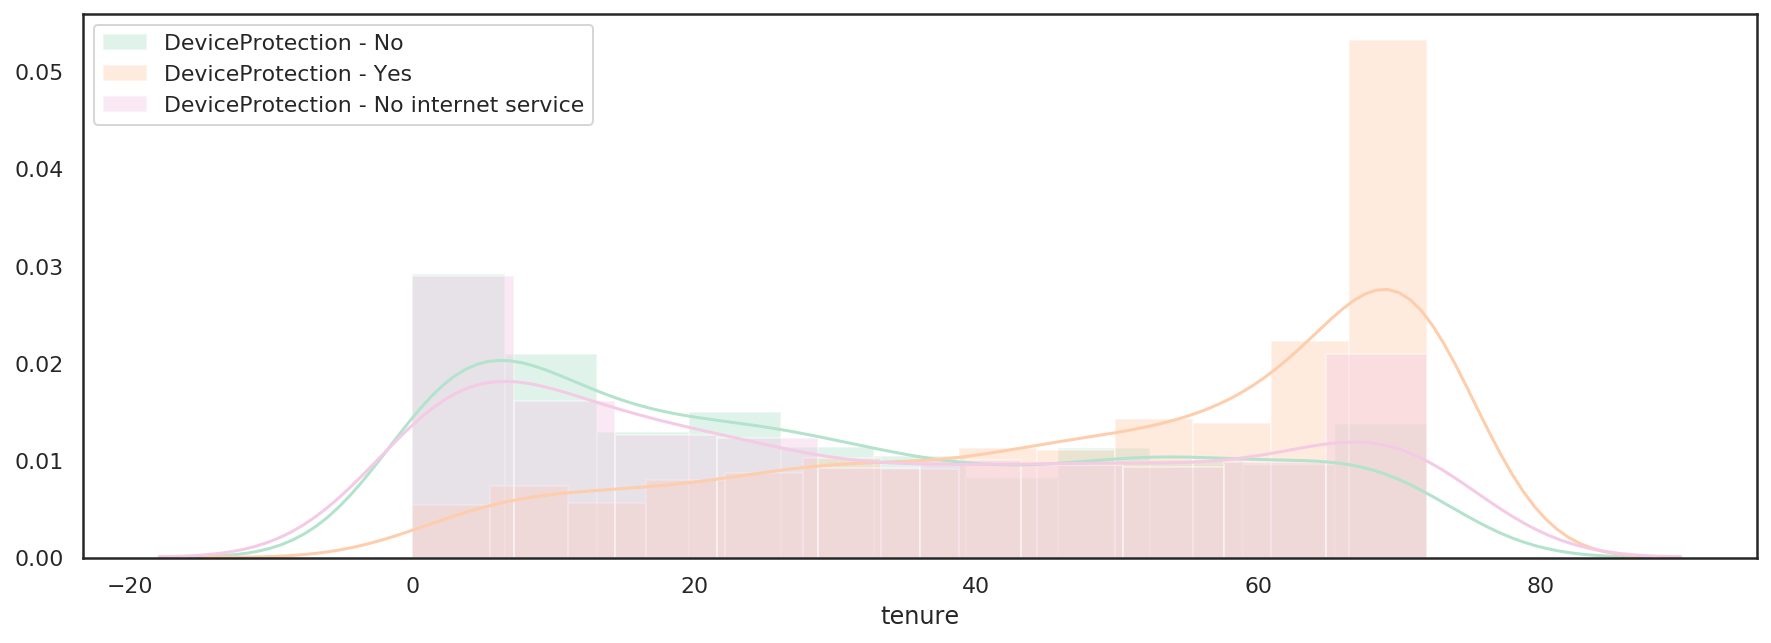

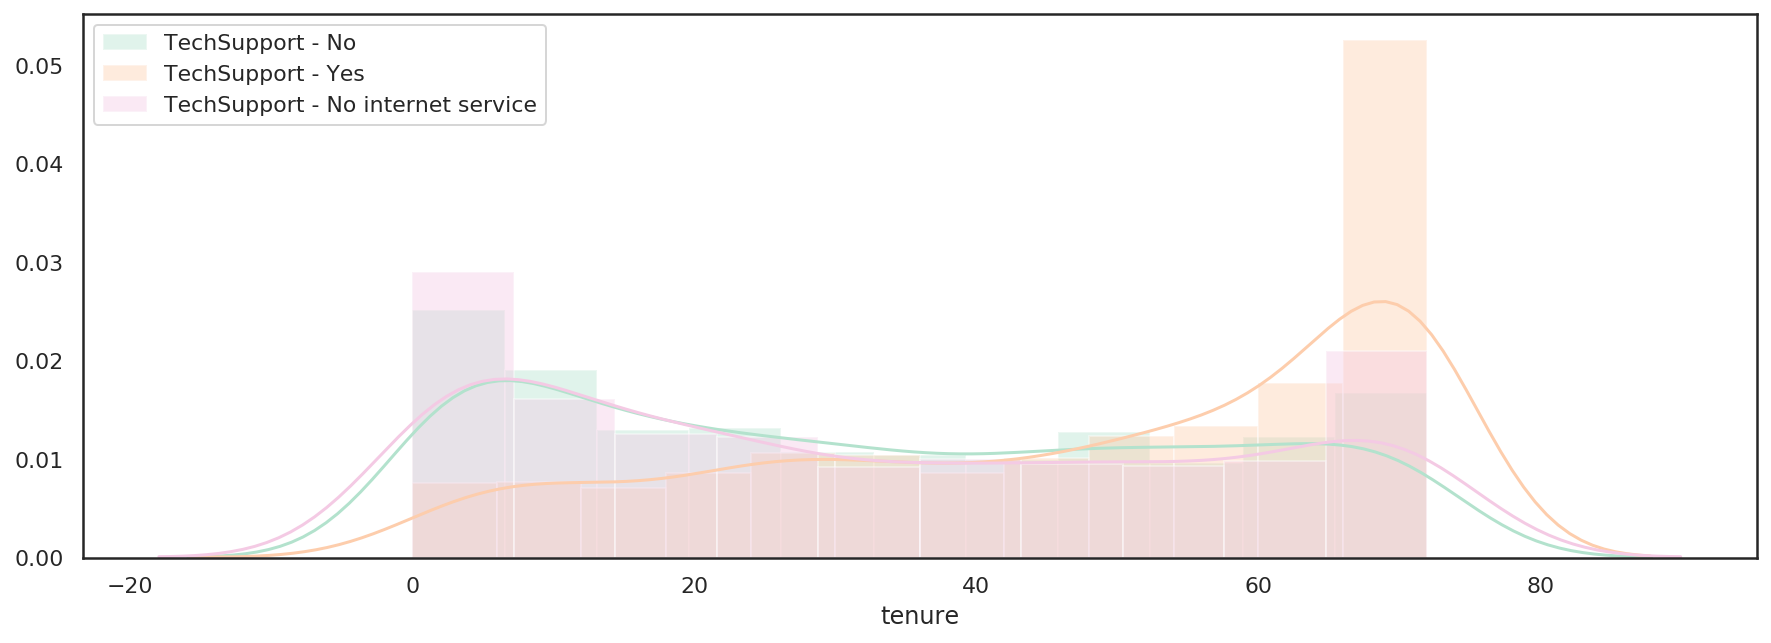

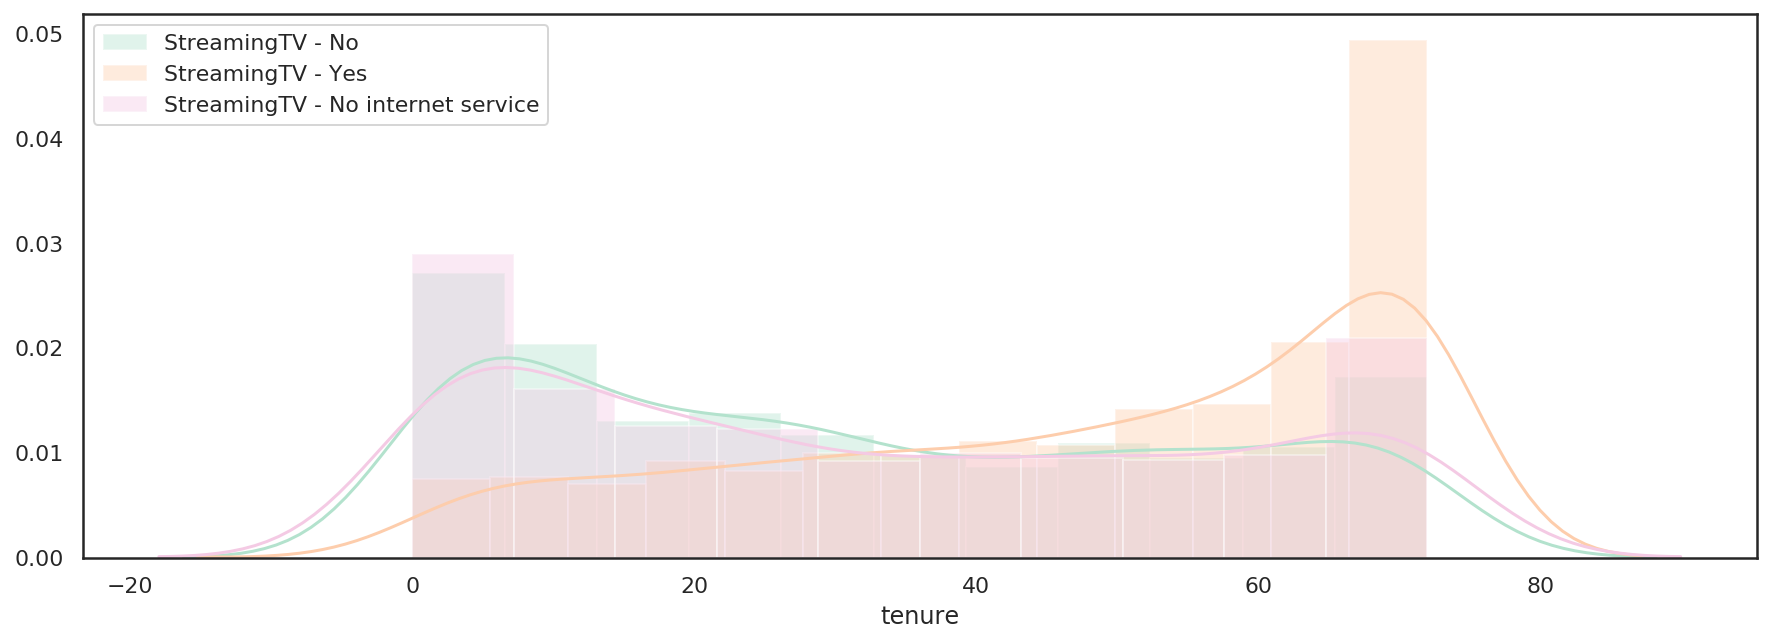

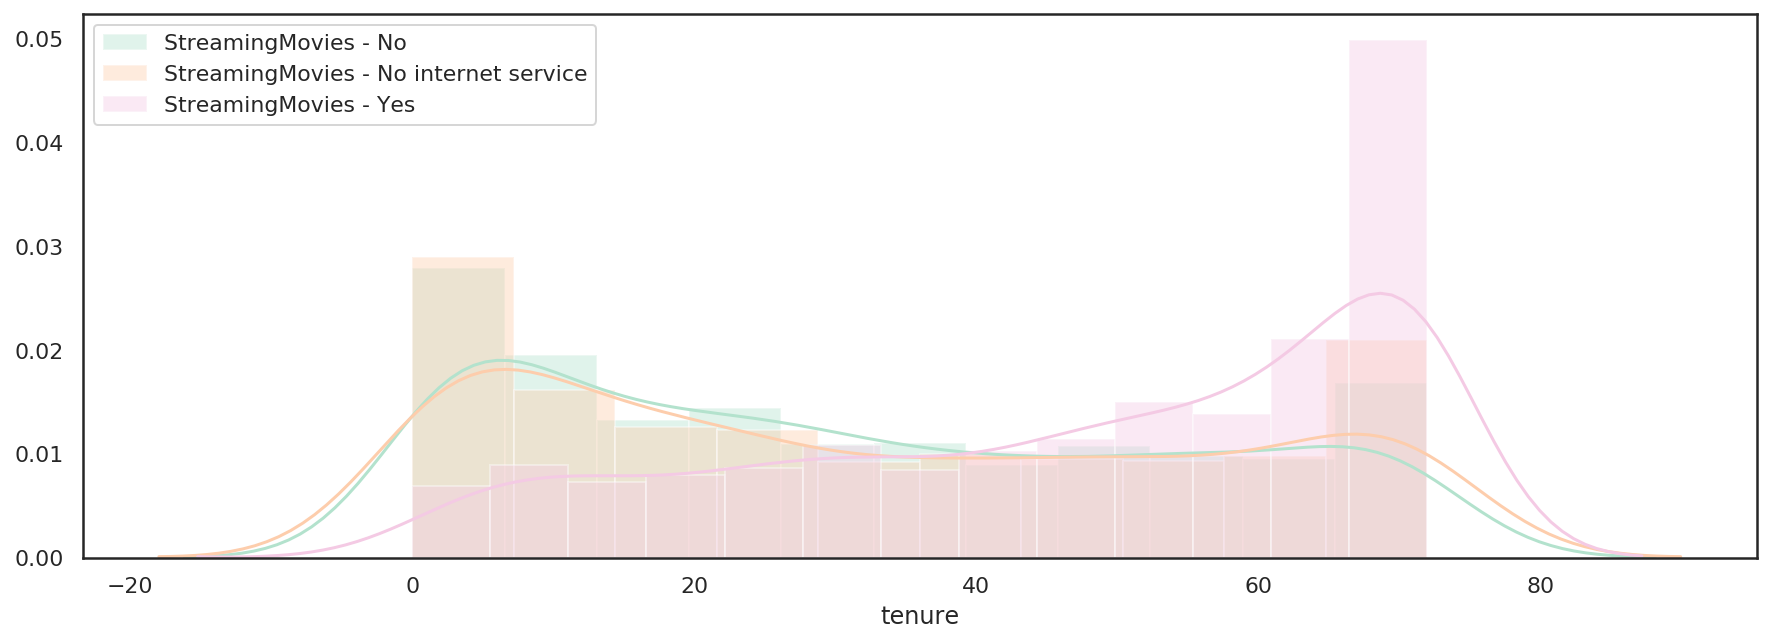

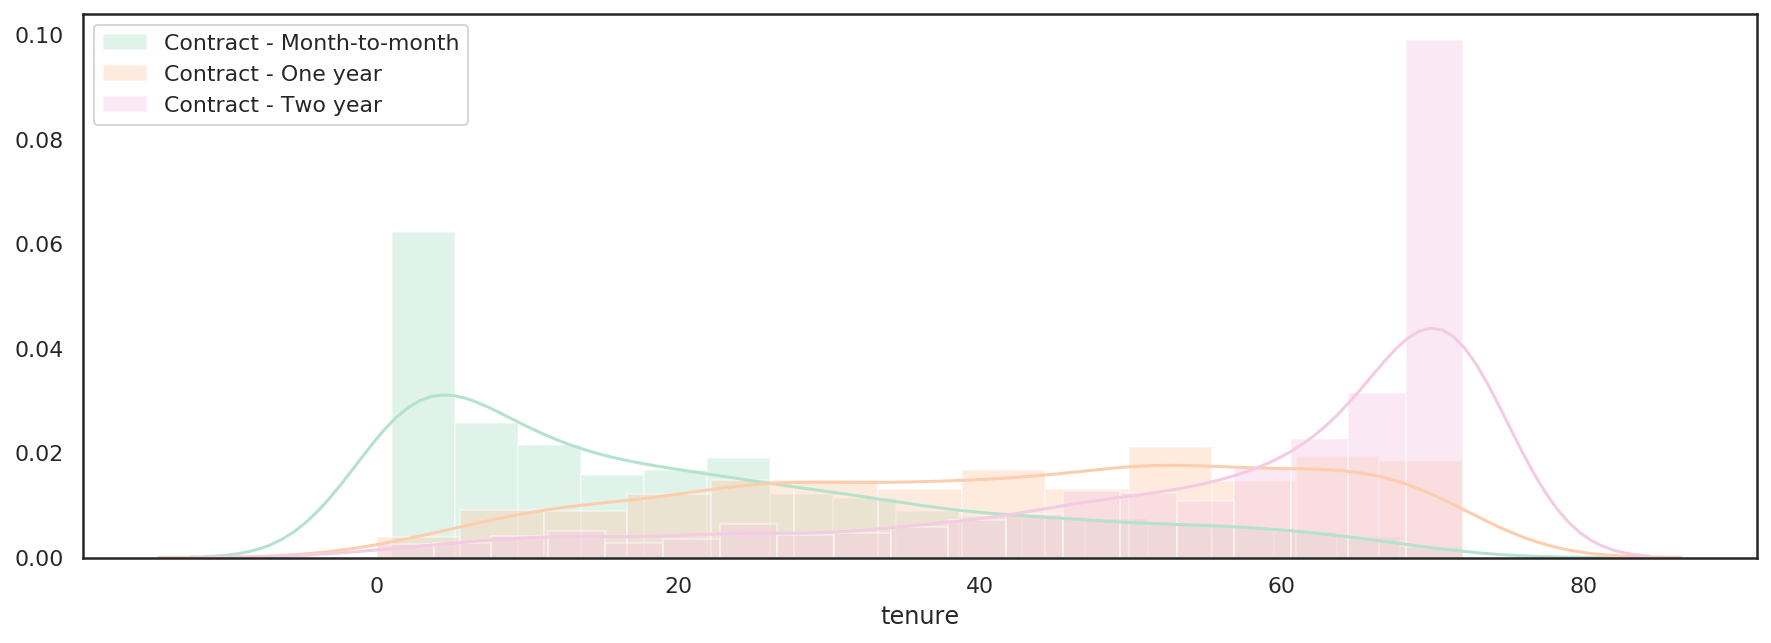

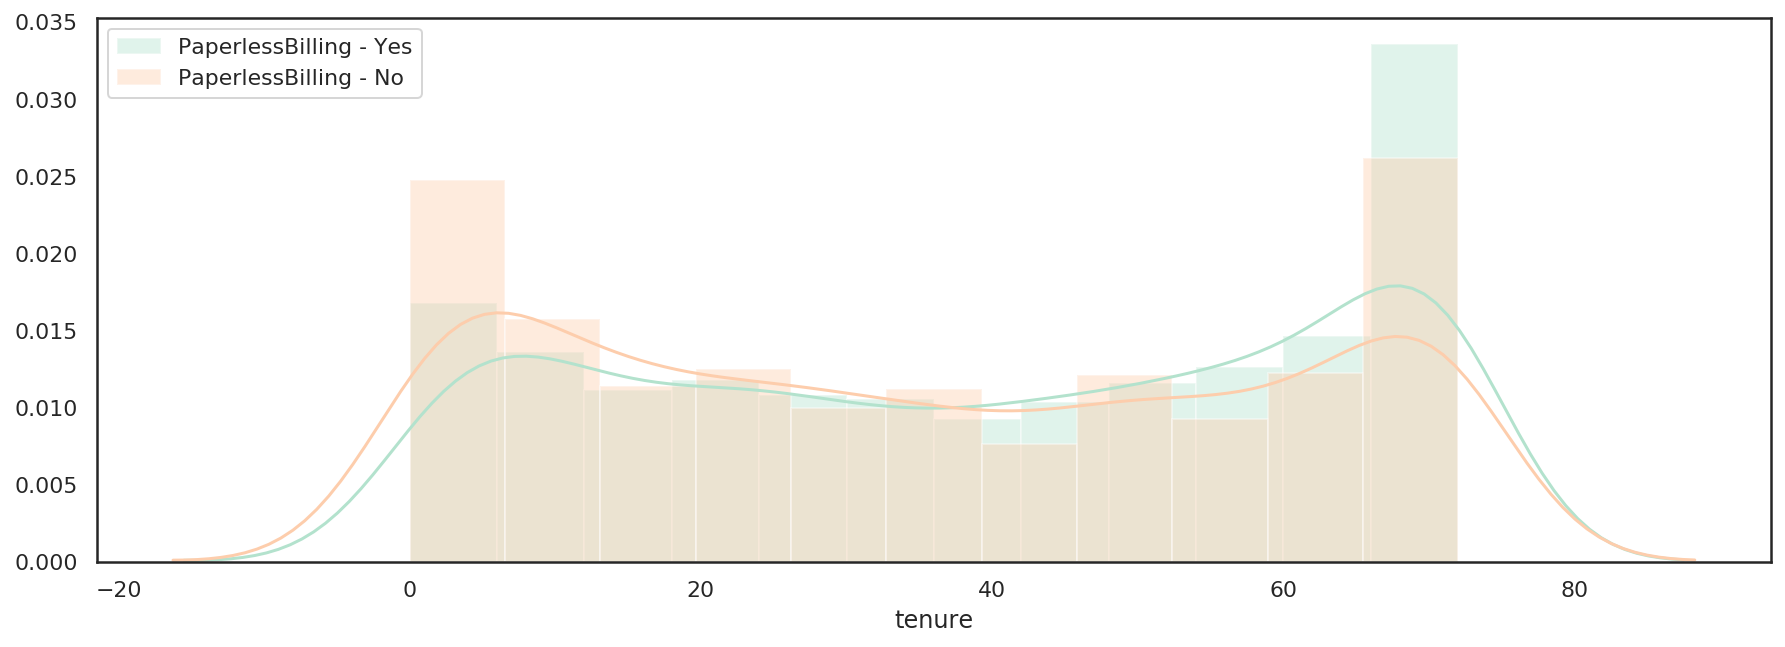

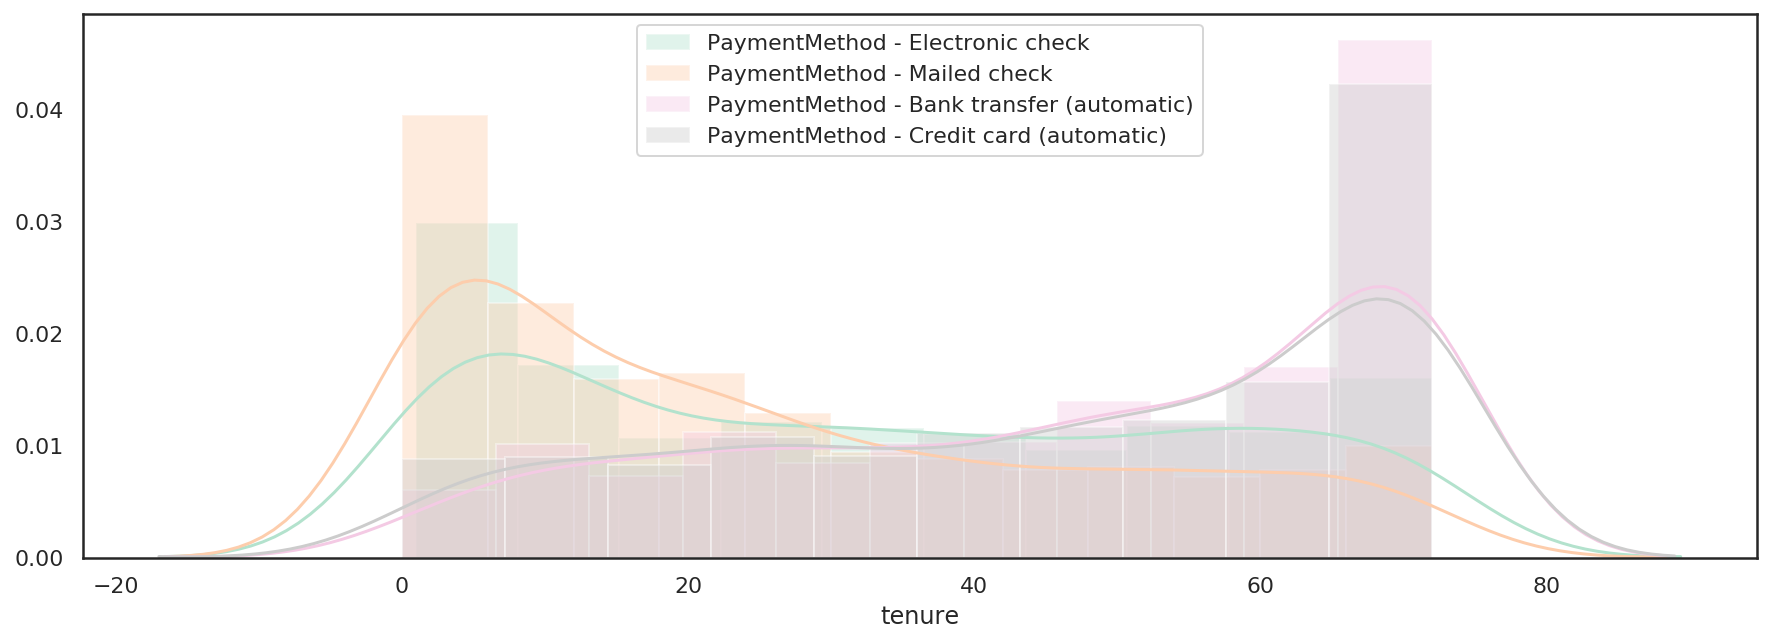

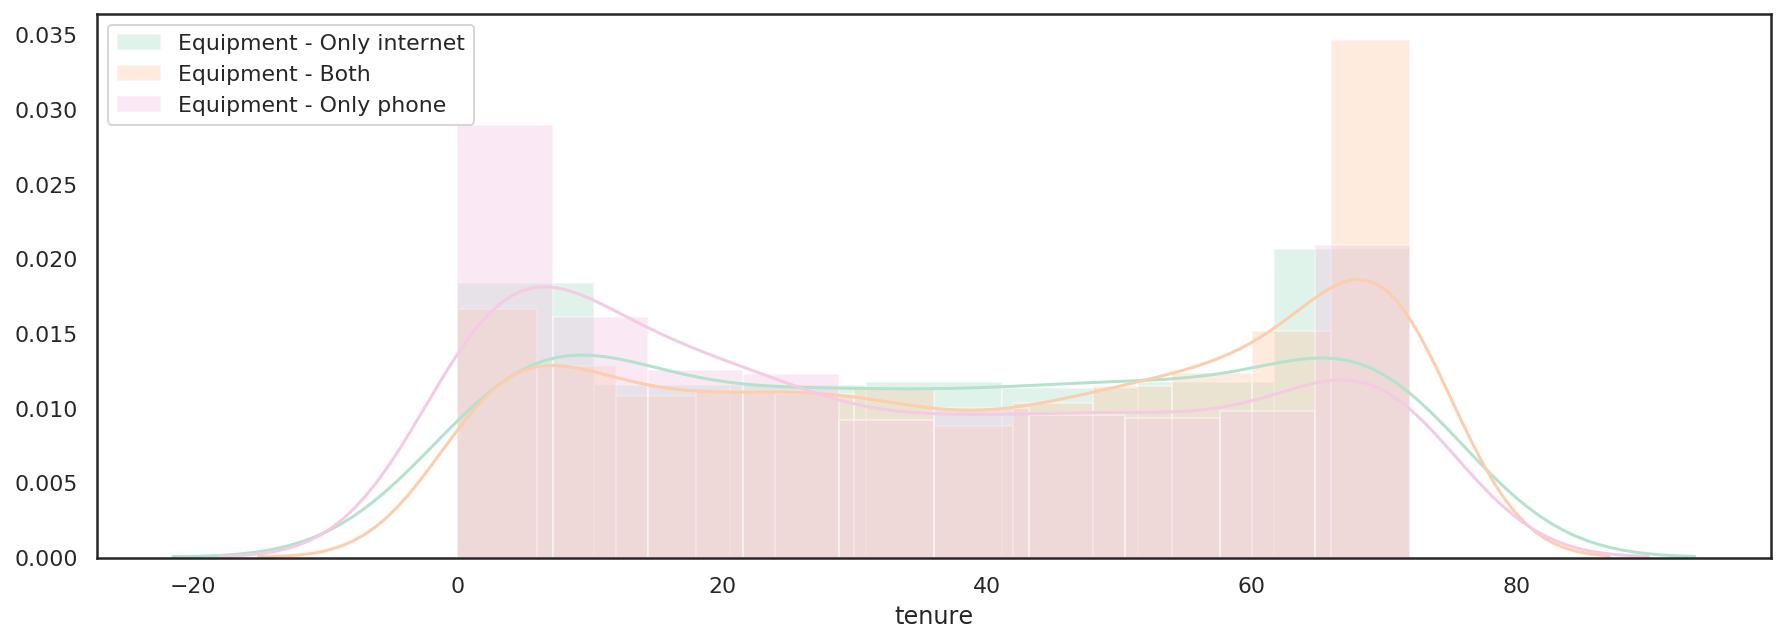

In [0]:
for feat in disc_col:
  possible_values = list(dict.fromkeys(df[feat].tolist()))
  if len(possible_values)==2:
    plt.figure(figsize=(15, 5))
    ax = sns.distplot(df[df[feat]==possible_values[0]]['tenure'],color=sns.color_palette("Pastel2")[0],label=str(feat+" - "+str(possible_values[0])))
    ax1 = sns.distplot(df[df[feat]==possible_values[1]]['tenure'],color=sns.color_palette("Pastel2")[1],label=str(feat+" - "+str(possible_values[1])))
    plt.legend()
    plt.show()
  if len(possible_values)==3:
    plt.figure(figsize=(15, 5))
    ax = sns.distplot(df[df[feat]==possible_values[0]]['tenure'],color=sns.color_palette("Pastel2")[0],label=str(feat+" - "+str(possible_values[0])))
    ax1 = sns.distplot(df[df[feat]==possible_values[1]]['tenure'],color=sns.color_palette("Pastel2")[1],label=str(feat+" - "+str(possible_values[1])))
    ax2 = sns.distplot(df[df[feat]==possible_values[2]]['tenure'],color=sns.color_palette("Pastel2")[3],label=str(feat+" - "+str(possible_values[2])))
    plt.legend()
    plt.show()
  if len(possible_values)==4:
    plt.figure(figsize=(15, 5))
    ax = sns.distplot(df[df[feat]==possible_values[0]]['tenure'],color=sns.color_palette("Pastel2")[0],label=str(feat+" - "+str(possible_values[0])))
    ax1 = sns.distplot(df[df[feat]==possible_values[1]]['tenure'],color=sns.color_palette("Pastel2")[1],label=str(feat+" - "+str(possible_values[1])))
    ax2 = sns.distplot(df[df[feat]==possible_values[2]]['tenure'],color=sns.color_palette("Pastel2")[3],label=str(feat+" - "+str(possible_values[2])))
    ax3 = sns.distplot(df[df[feat]==possible_values[3]]['tenure'],color=sns.color_palette("Pastel2")[7],label=str(feat+" - "+str(possible_values[3])))
    plt.legend()
    plt.show()

We have several interesting graphs among the 16 plotted above. All of the following parameters greatly increase the probability of having a large tenure: 
- Partner - Yes
- MultipleLines - Yes
- Online Security - Yes
- OnlineBackup - Yes
- DeviceProtection - Yes
- TechSupport - Yes
- StreamingTV - Yes
- StreamingMovies - Yes
- Equipment - Both
- PaymentMethod - Bank Transfer & Credit Card
- Contract - Two year

In particular the graph plotting the **tenure** in function of the **contract duration** is interesting in the way that it shows a very interesting features of our dataset. As a matter of fact, the longer the contract, the highest the proportion of people with a big tenure. It will help our marketing team to target promotion plan on long term contract. This graph shows us that people with a longer contract has a tendency to have a longer tenure. So if we reduce price of longer contract, we should have more people interested in it.


We can observe clearly that people who pay by bank transfer or credit card (automatic payment) tend to stay much longer than those who pay electronically or by mail. This makes sense as people do not need to make any action to continue paying, if they have to make the payment themselves every month, they tend to reevaluate much more their engagement.

In general, what can be derived from these graphs is that the more the customer subscribes to a quality service (more security services, streaming, equipment, ...), the more his tenure increases. This is doubly beneficial for us because a quality service is more expensive for the customer and the customer is more loyal.

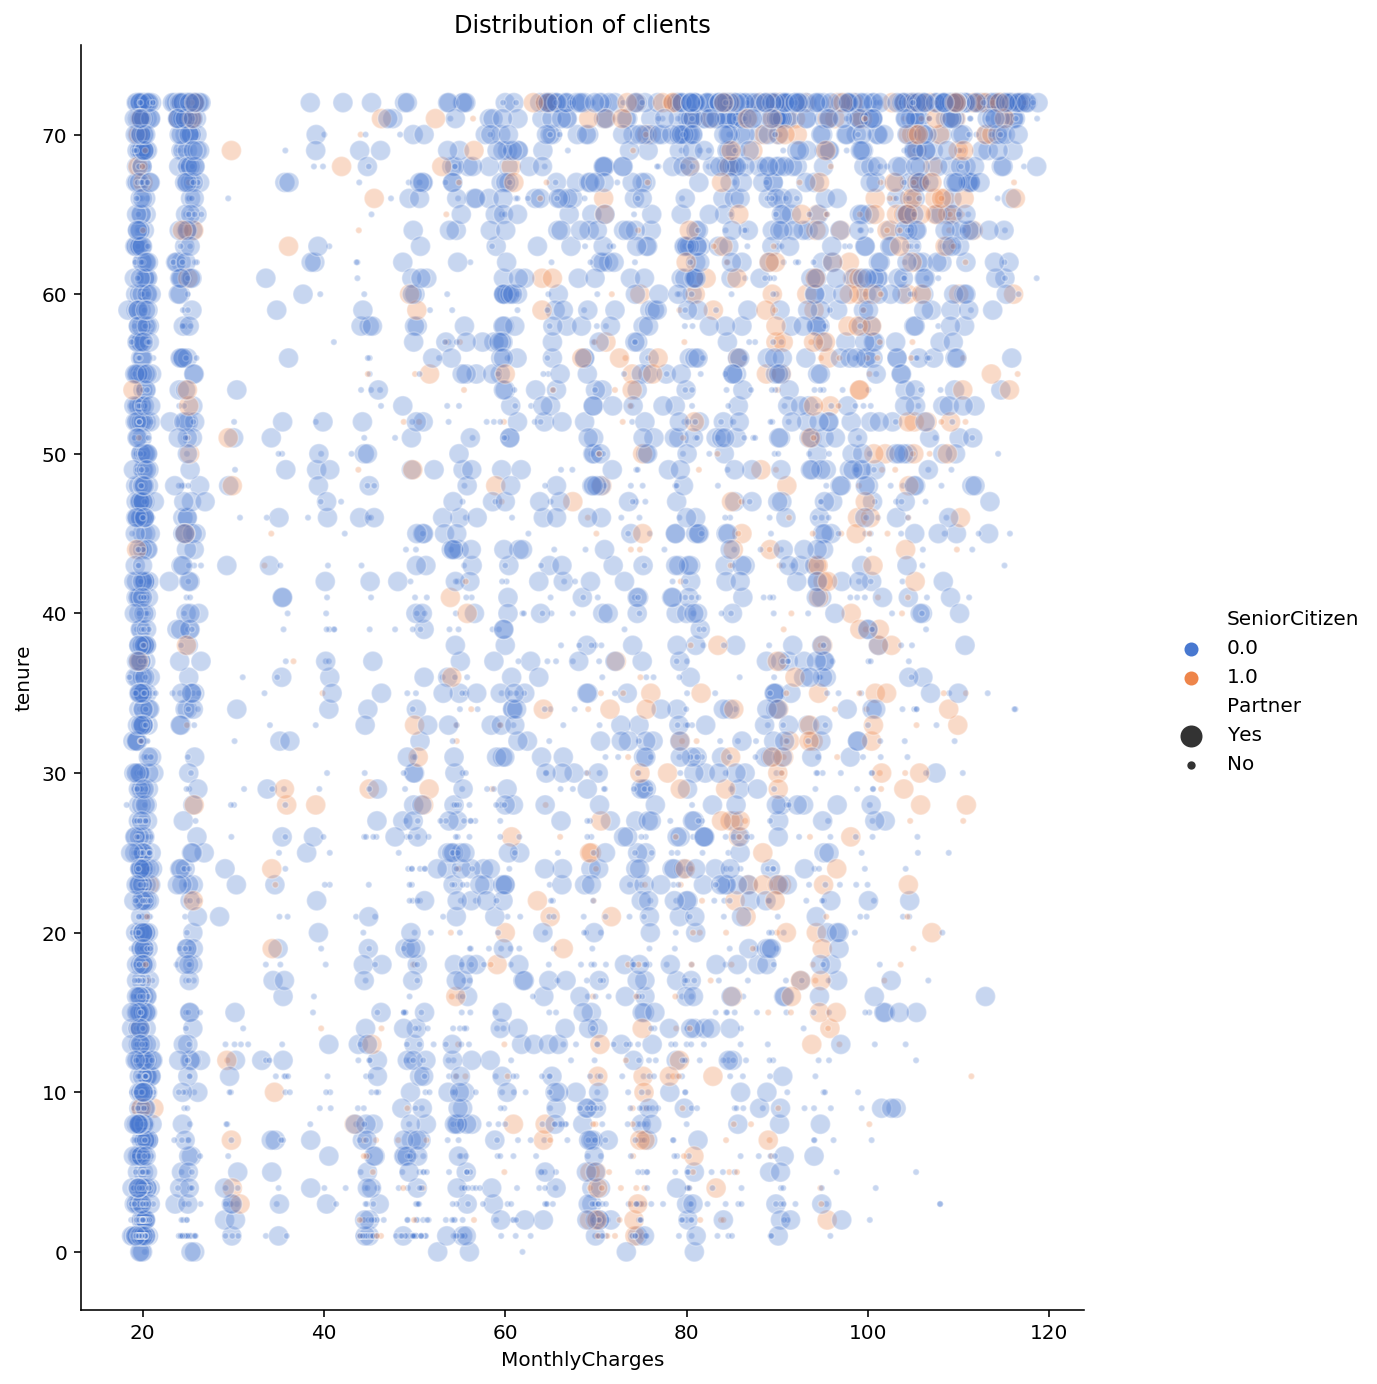

In [0]:
sns.relplot(x="MonthlyCharges", y="tenure", hue="SeniorCitizen", size="Partner", sizes=(10, 100), alpha=.3, palette="muted",
            height=6, data=df)
plt.title('Distribution of clients')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In the graph above, we explore the influence of the senior and partnership status on the monthly charges and tenure time. We could think at first that these two would have an impact on the lifetime value of the customers, but seeing the plot, we see that both are spread throughout without visible segmentation. 


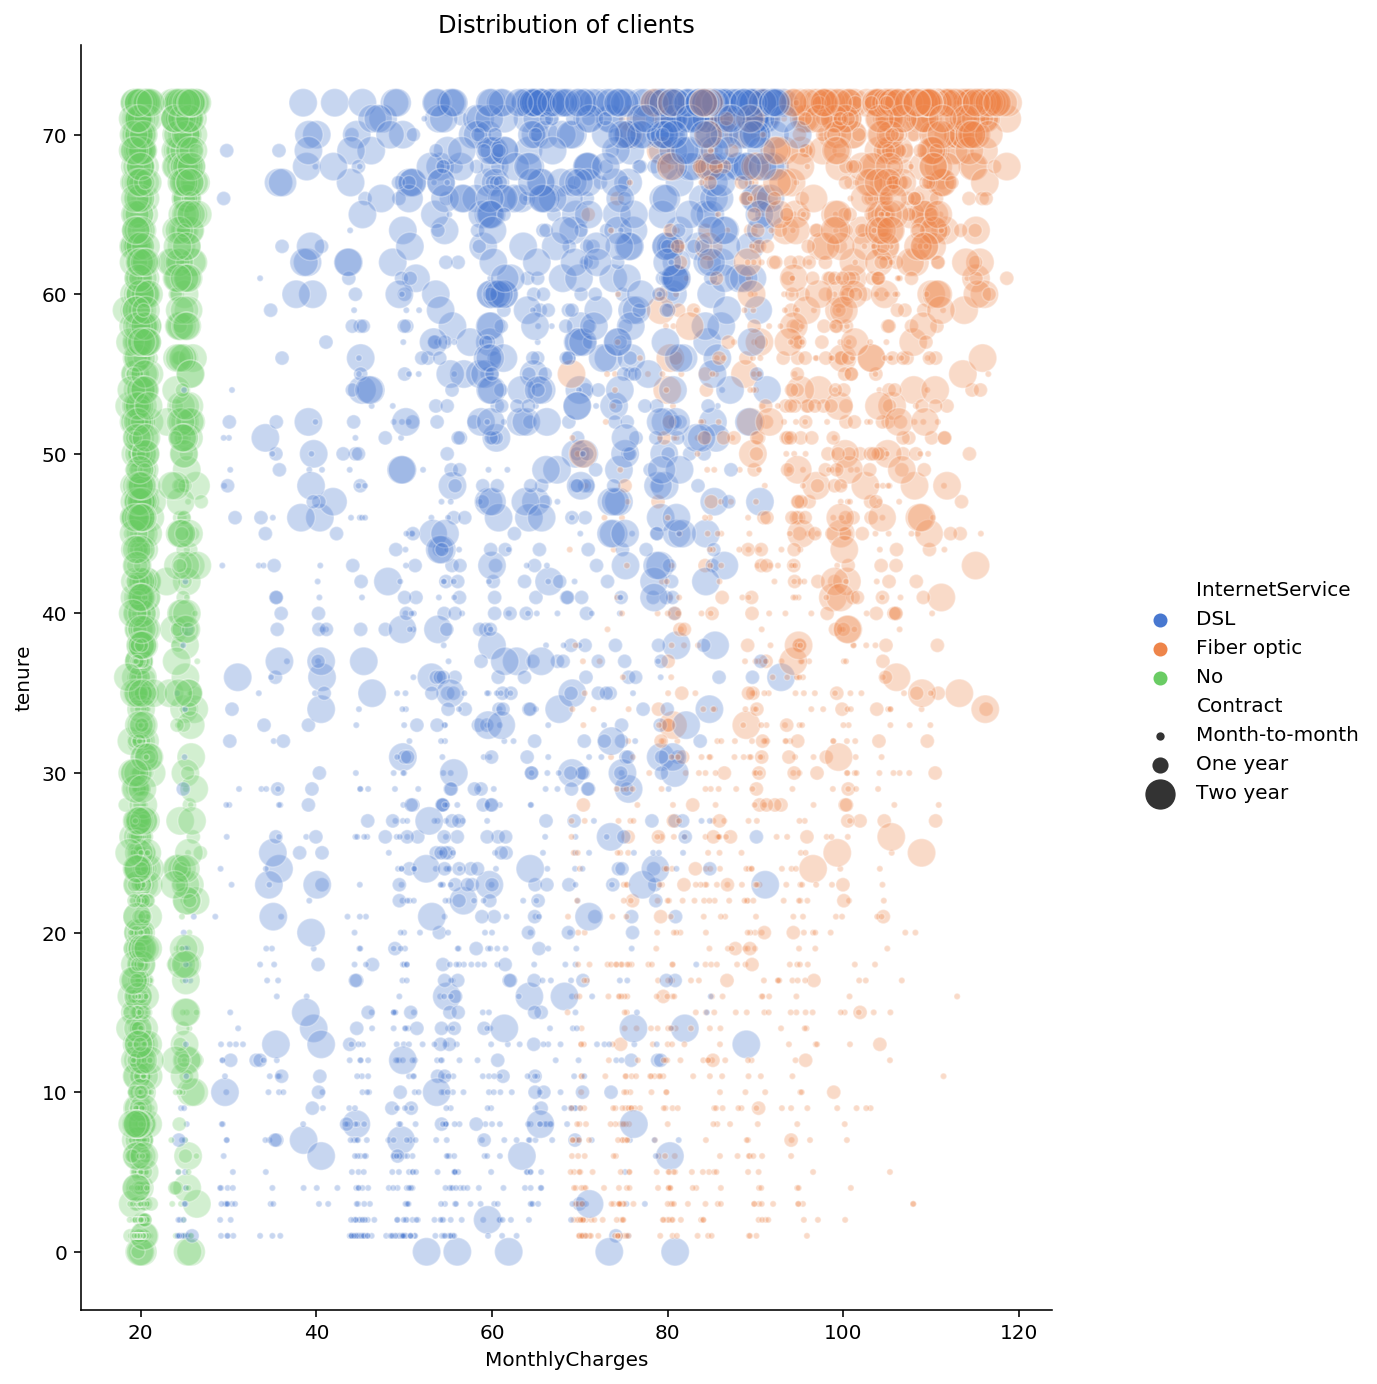

In [0]:
sns.relplot(x="MonthlyCharges", y="tenure", hue="InternetService", size="Contract", sizes=[10, 50, 200], alpha=.3, palette="muted",
            height=6, data=df)
plt.title('Distribution of clients')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Two key factors are highlighted in the figure above. First, we see that the type of contract is related to the tenure time. A two year contract is associated a lot more with a longer tenure time than the month-to-month contract type. 
Then, we see that there is a clear segmentation possible in the monthly charges as a function of the internet services. We see that 3 categories are made obvious. We see also that the interval of payment for the 3 categories are very different. The customers who have no internet service have a very low variance of payment. The clients who are provided with fiber optic have a higher variance in the monthly payment, but much less than the customers who chose DSL. This means that these customers are either only taking internet and nothing else, but other choose numerous services, like movie streaming and so on. This is a key aspect of the client segmentation. 

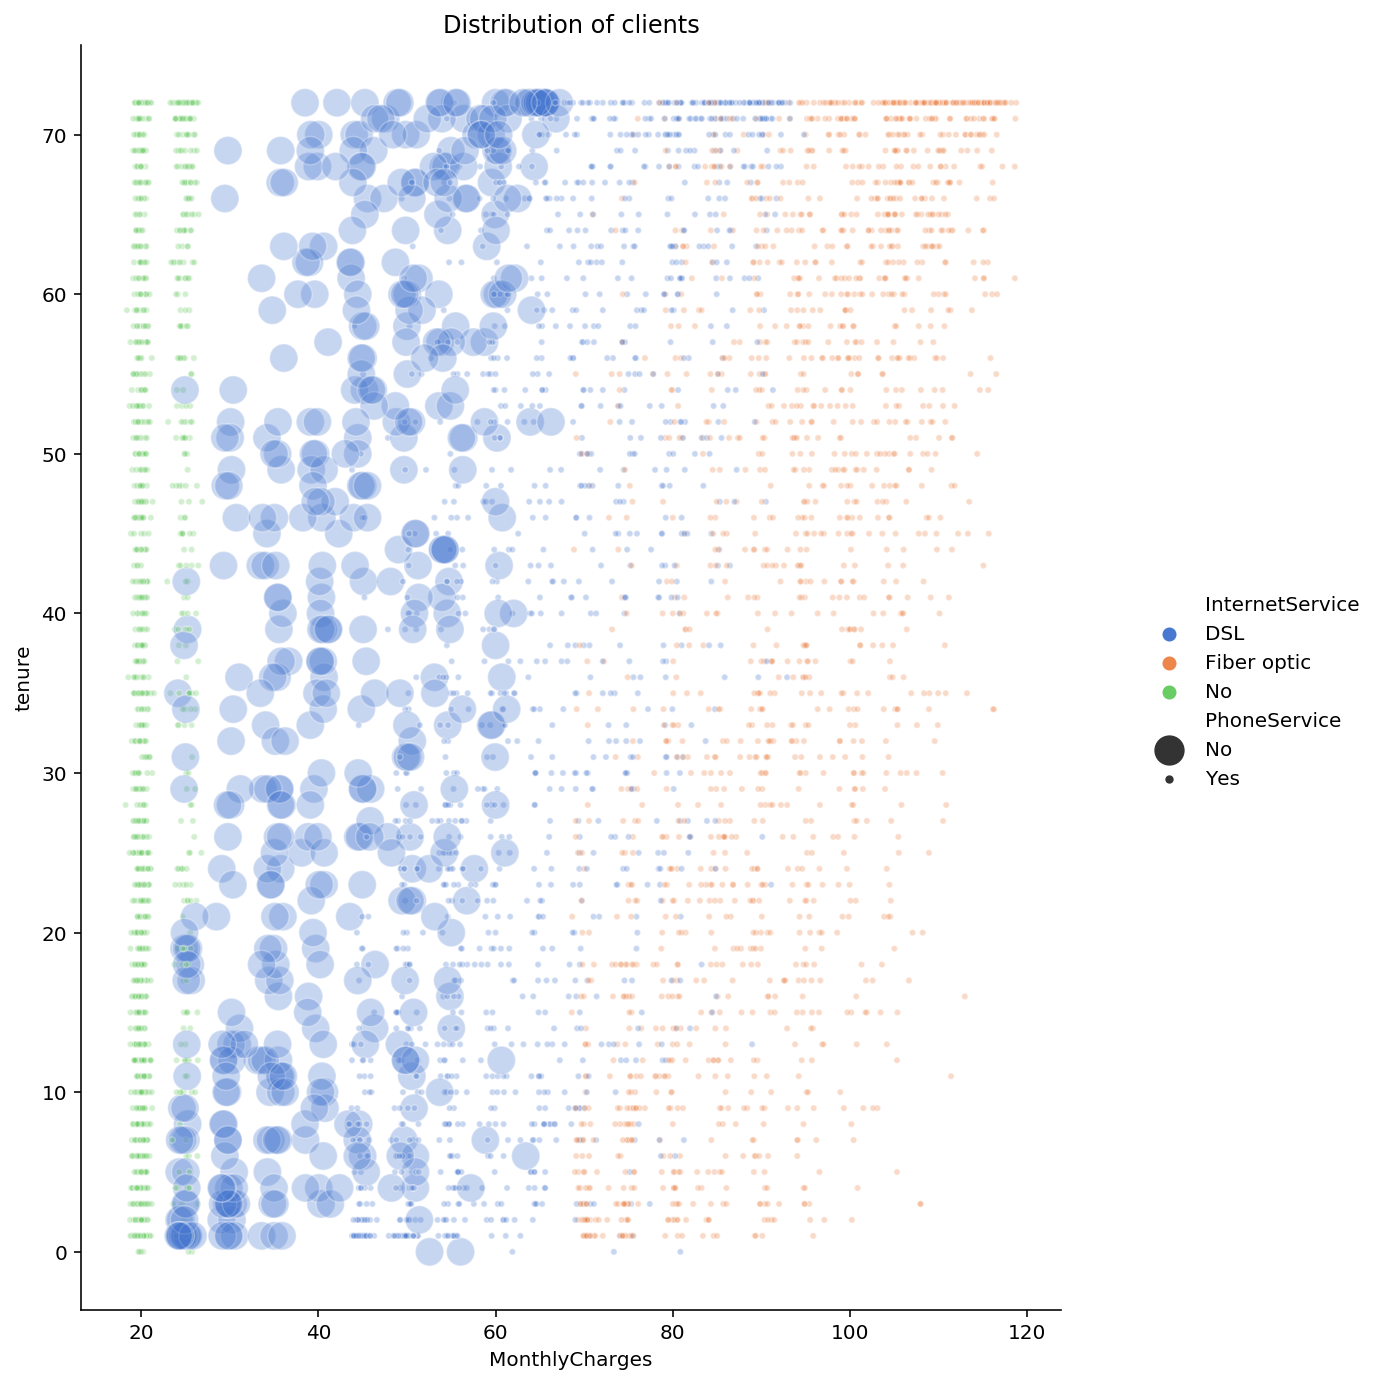

In [0]:
sns.relplot(x="MonthlyCharges", y="tenure", hue="InternetService", size="PhoneService", sizes=(10, 200), alpha=.3, palette="muted",
            height=6, data=df)
plt.title('Distribution of clients')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

This graph further shows the possible segmentation of the customer base. We see that the clients who chose DSL are the ones that are most easily choosing, or not, to get additional services online backup, device protection or tech support. Indeed, they are the ones who mostly choose either only internet or a more expensive package. It is possible that a more complete fied priced package is avaible for fiber optics clients but does not exist for DSL clients. 

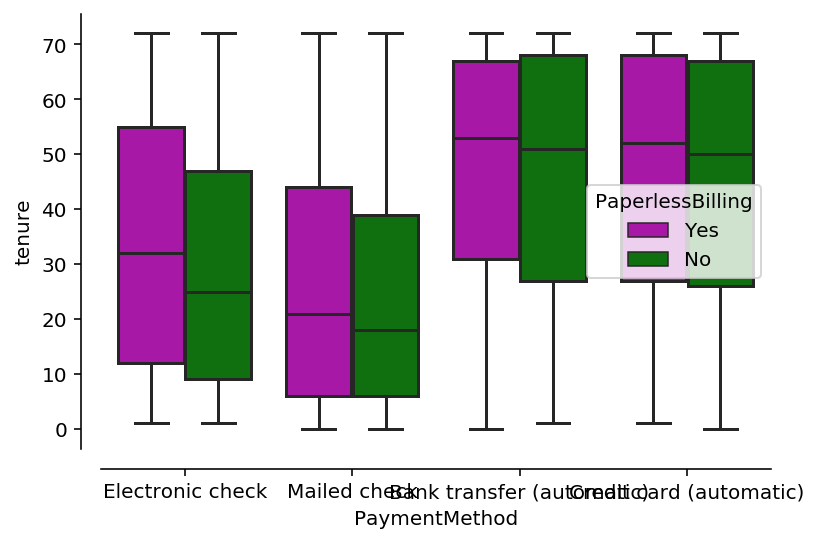

In [0]:
sns.boxplot(x="PaymentMethod", y="tenure",
            hue="PaperlessBilling", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=False)

In the figure above, we see that on average, customers who pay by check tend to have a lower tenure time than the ones who pay by credit card or bank transfer. It is important to remain carefull about these types of information because it is very difficult to prove a real correlation bewteen the tenure time and the time of payment. This could only be a random effect.

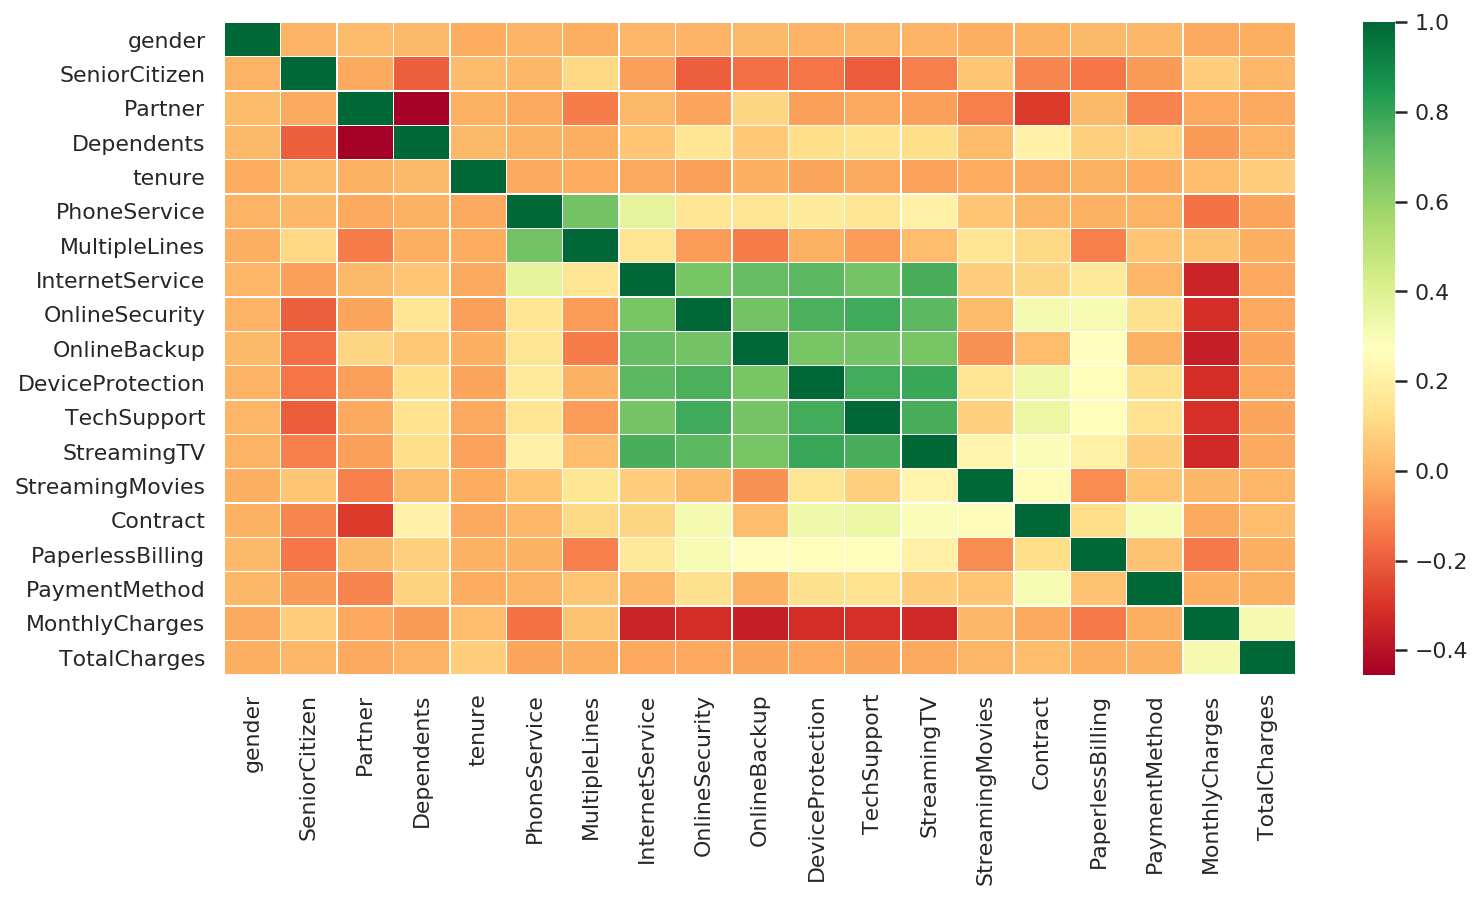

In [0]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="RdYlGn")


**Conclusion**

In a nutshell, this study brings a lot of information to the marketing team. It should help them to prepare the right marketing strategy. We highlighted the different contract and population that the marketing team should target to improve the loyalty of customer.
We have observe that some features are clearly improving the tenure: 
- Automatic payment: clients paying automatically tend to stay longer.
- Type of contract: with 2-year contracts, clients stay longer than with month-to-month contract.
- Internet service: clients with DSL or fiber optic stay have a higher tenure.